# Sales Forecasting

## Importing the Data

In [1]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv("SalesData.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sales

Unnamed: 0 Unnamed: 1 Actual Sales Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0     SKU No.   Category       Jan-19     Feb-19     Mar-19     Apr-19   
1     254612I        Nut        52759      23860      39922      26096   
2     120398I        Nut       107779      53588      84009      52728   
3     100066I        Nut       108879      58004      69107      59054   
4     102046I        Nut        47481      32051      44812      28214   
..        ...        ...          ...        ...        ...        ...   
67    305529I        Nut          NaN        NaN        NaN        NaN   
68    124220I         PC         3831       6916       4008       4376   
69    294383I         PC            0          0          0          0   
70    306912I         PC            0          0          0          0   
71    296555I        Att          NaN        NaN        NaN        NaN   

   Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 16331  \
0      May-19     Jun-19     Jul-19     Aug-19  ...            NaN   
1       25830      33218      96455      24199  ...            NaN   
2       14737      47086      51943      48723  ...            NaN   
3       64066      76798      71777      71625  ...            NaN   
4       29577      36732      34555      34558  ...            NaN   
..        ...        ...        ...        ...  ...            ...   
67        NaN        NaN        NaN        NaN  ...            NaN   
68       4126       3894      28526       7685  ...            NaN   
69          0          0          0          0  ...            NaN   
70          0          0          0          0  ...            NaN   
71        NaN        NaN        NaN        NaN  ...            NaN   

   Unnamed: 16332 Unnamed: 16333 Unnamed: 16334 Unnamed: 16335 Unnamed: 16336  \
0             NaN            NaN            NaN            NaN            NaN   
1             NaN            NaN            NaN            NaN            NaN   
2             NaN            NaN            NaN            NaN            NaN   
3             NaN            NaN            NaN            NaN            NaN   
4             NaN            NaN            NaN            NaN            NaN   
..            ...            ...            ...            ...            ...   
67            NaN            NaN            NaN            NaN            NaN   
68            NaN            NaN            NaN            NaN            NaN   
69            NaN            NaN            NaN            NaN            NaN   
70            NaN            NaN            NaN            NaN            NaN   
71            NaN            NaN            NaN            NaN            NaN   

   Unnamed: 16337 Unnamed: 16338 Unnamed: 16339 Unnamed: 16340  
0             NaN            NaN            NaN            NaN  
1             NaN            NaN            NaN            NaN  
2             NaN            NaN            NaN            NaN  
3             NaN            NaN            NaN            NaN  
4             NaN            NaN            NaN            NaN  
..            ...            ...            ...            ...  
67            NaN            NaN            NaN            NaN  
68            NaN            NaN            NaN            NaN  
69            NaN            NaN            NaN            NaN  
70            NaN            NaN            NaN            NaN  
71            NaN            NaN            NaN            NaN  

[72 rows x 16341 columns]

## Cleaning the Data

In [4]:
def clean_dataset(sales= sales):
    sales.columns = sales.iloc[0]
    sales = sales[1:]
    sales = sales.iloc[:,:26]
    sales = sales.dropna()
    sales = sales.transpose()
    sales.columns = sales.iloc[0]
    sales = sales[2:]
    for column in sales.columns:
        sales[column] = sales[column].astype('int')
    sales = sales.reset_index()
    sales = sales.rename(columns = {0:'Month'})
    return sales

In [5]:
sales = clean_dataset()

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 70 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    24 non-null     object
 1   254612I  24 non-null     int32 
 2   120398I  24 non-null     int32 
 3   100066I  24 non-null     int32 
 4   102046I  24 non-null     int32 
 5   120399I  24 non-null     int32 
 6   254610I  24 non-null     int32 
 7   271553I  24 non-null     int32 
 8   105074I  24 non-null     int32 
 9   100352I  24 non-null     int32 
 10  101419I  24 non-null     int32 
 11  124074I  24 non-null     int32 
 12  285859I  24 non-null     int32 
 13  282128I  24 non-null     int32 
 14  121547I  24 non-null     int32 
 15  282127I  24 non-null     int32 
 16  119675I  24 non-null     int32 
 17  106678I  24 non-null     int32 
 18  285866I  24 non-null     int32 
 19  282126I  24 non-null     int32 
 20  119809I  24 non-null     int32 
 21  273164I  24 non-null     int32 
 22  1029

In [7]:
sales.head(3)

SKU No.   Month  254612I  120398I  100066I  102046I  120399I  254610I  \
0        Jan-19    52759   107779   108879    47481    34558    26295   
1        Feb-19    23860    53588    58004    32051    21554    23705   
2        Mar-19    39922    84009    69107    44812    31370    28292   

SKU No.  271553I  105074I  100352I  ...  124218I  124219I  A5985ID  A8617ID  \
0              0    42325    23375  ...        0        0    12633     4560   
1              0    22587    11705  ...        0        0     6010     2399   
2              0    35221    16402  ...        0        0     9164     3159   

SKU No.  A8058ID  A8669ID  A4302ID  124220I  294383I  306912I  
0           6719     5896     6085     3831        0        0  
1           3136     3004     3621     6916        0        0  
2           4742     3217     5458     4008        0        0  

[3 rows x 70 columns]

## Plotting the Data

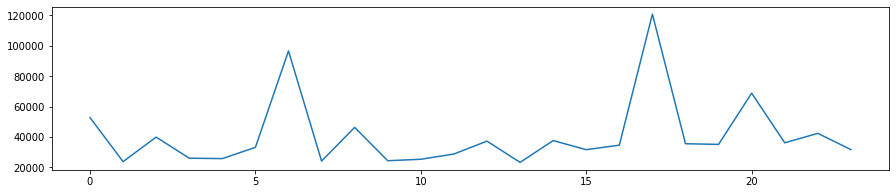

In [8]:
plt.figure(figsize = (15,3))
plt.plot(sales.index, sales[sales.columns[1]])
plt.show()

In [9]:
def plot_all():
    for column in sales.columns[1:]:
        plt.figure(figsize = (15,2.5))
        plt.plot(sales.index, sales[column])
        plt.title(column)
        plt.show()

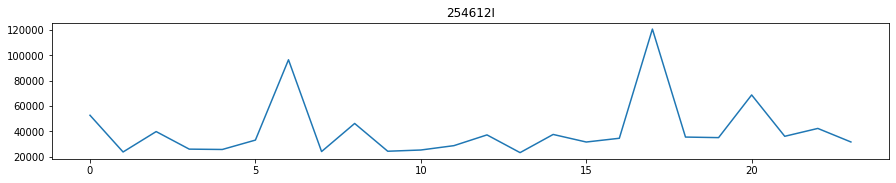

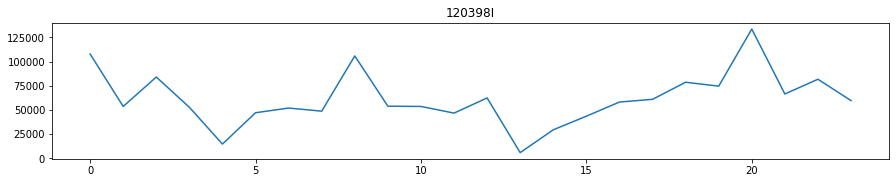

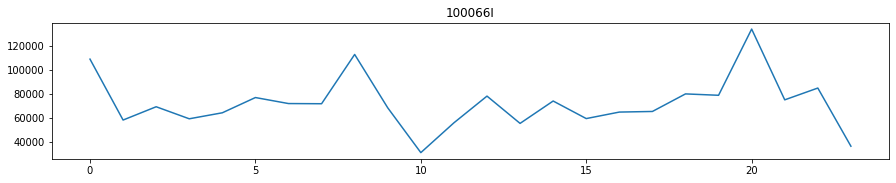

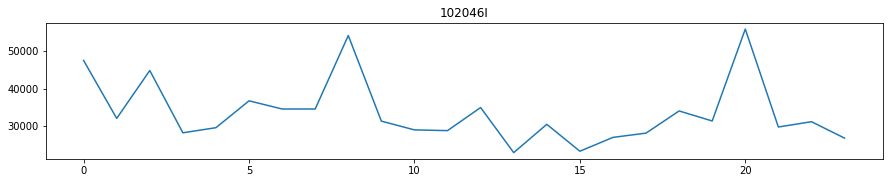

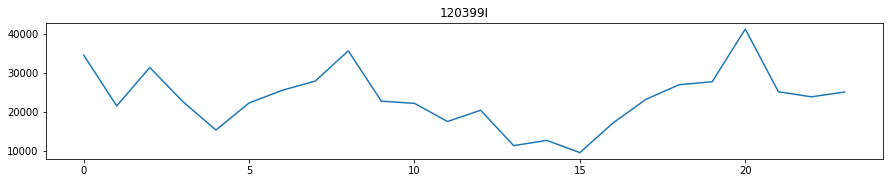

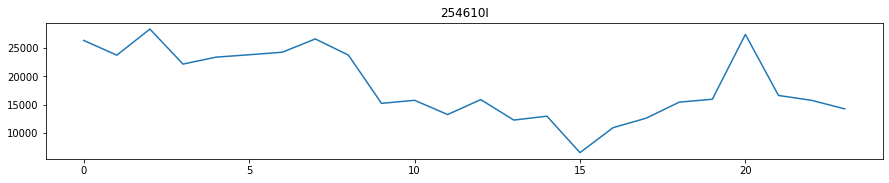

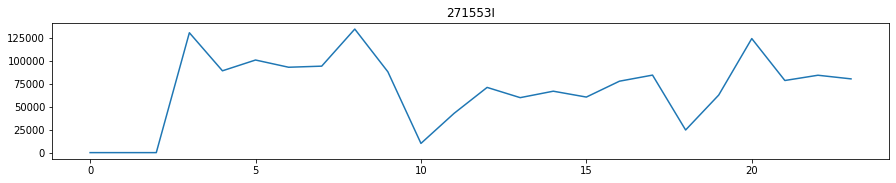

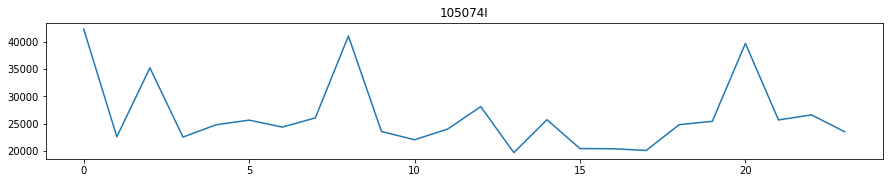

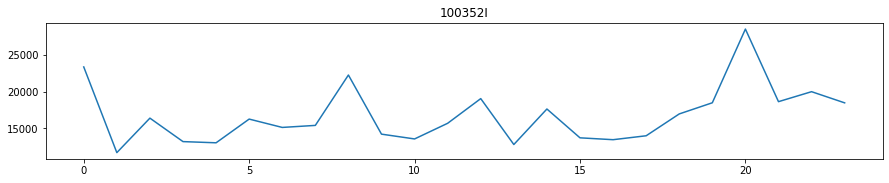

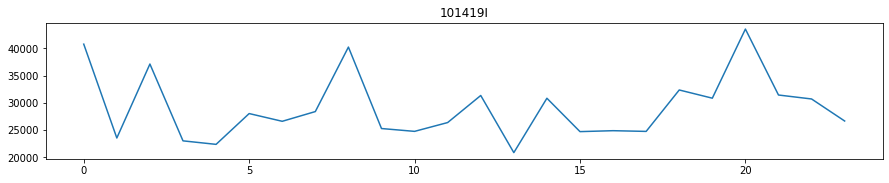

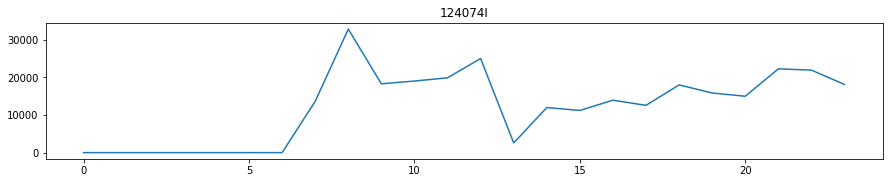

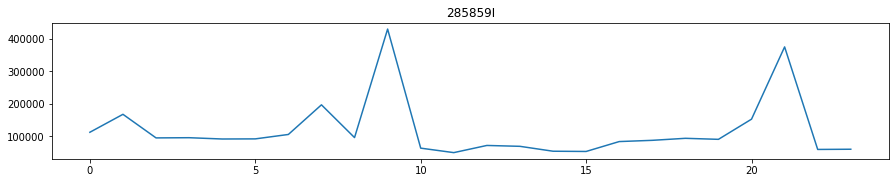

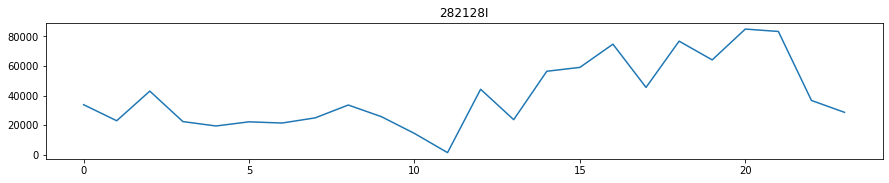

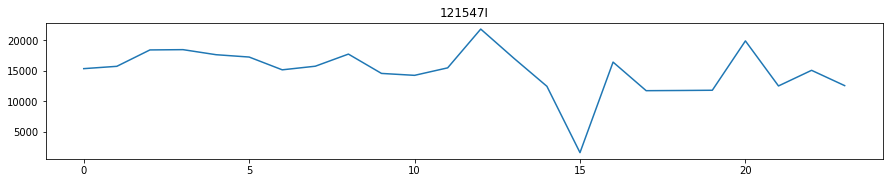

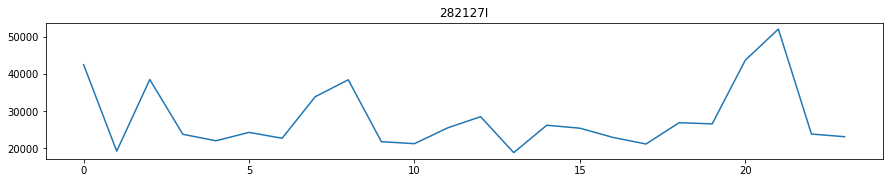

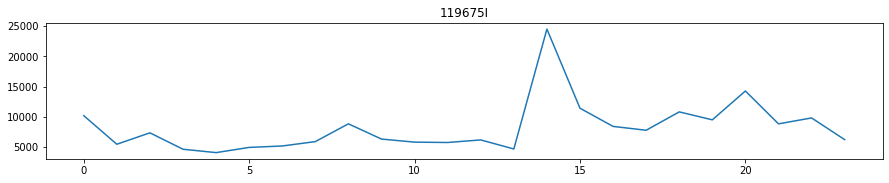

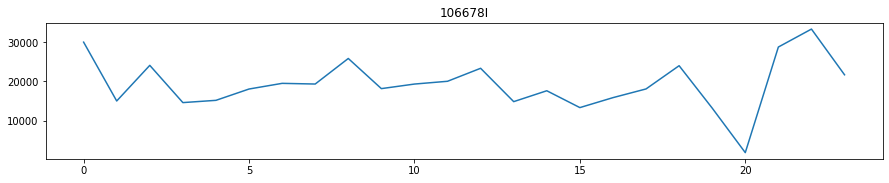

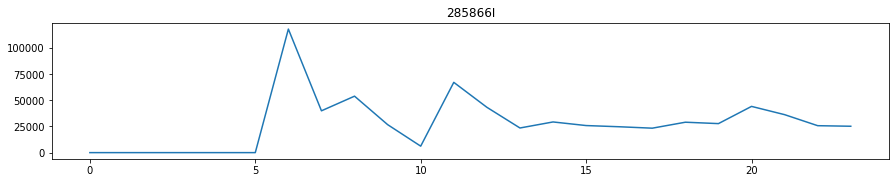

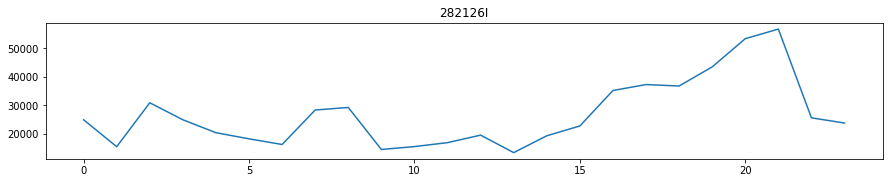

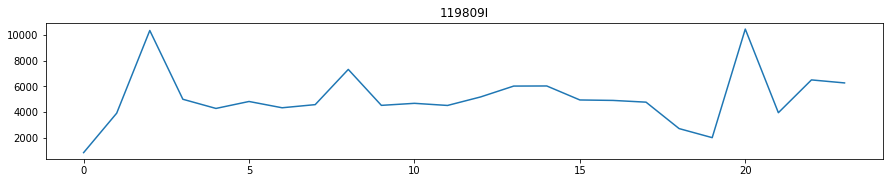

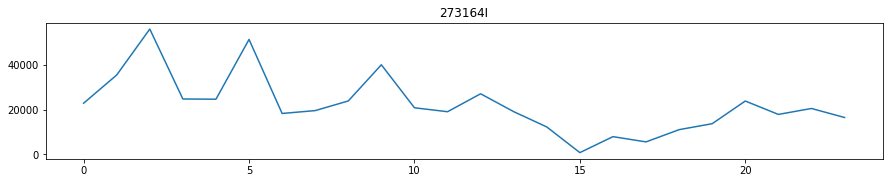

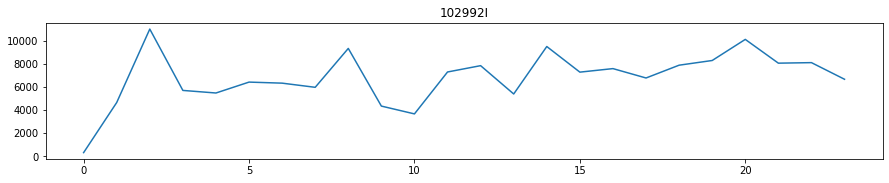

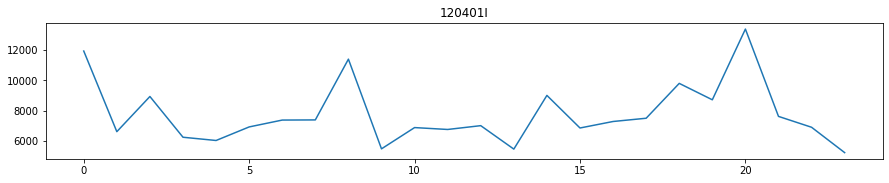

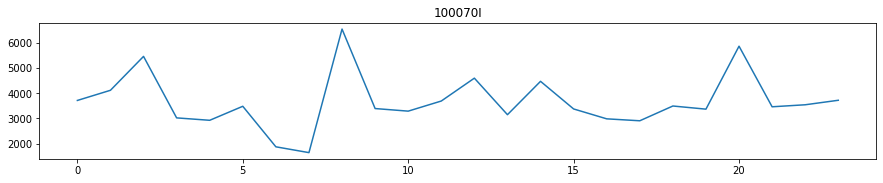

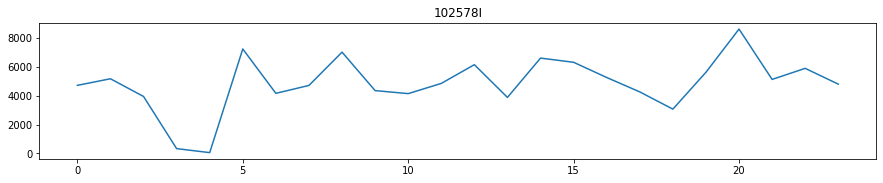

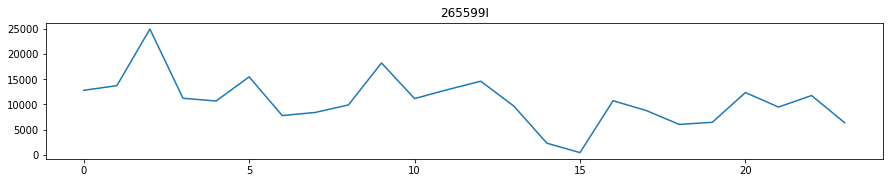

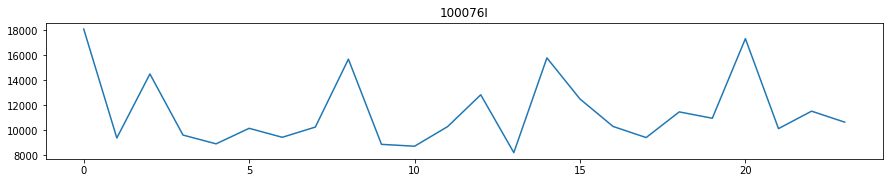

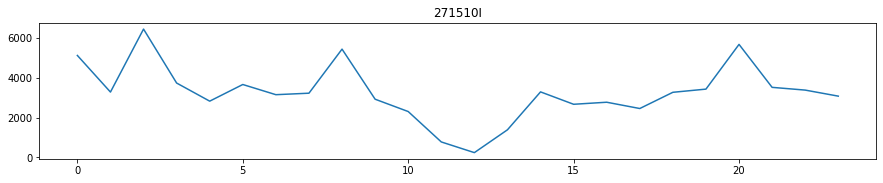

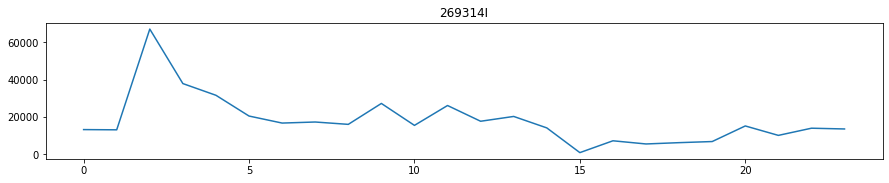

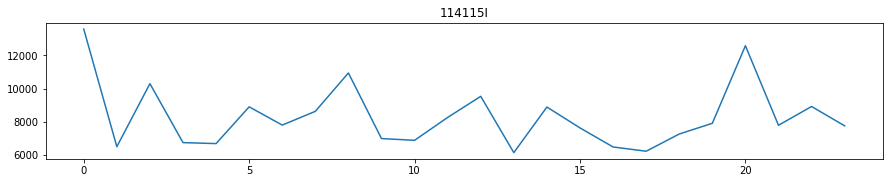

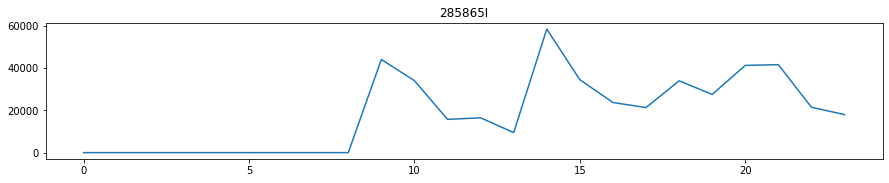

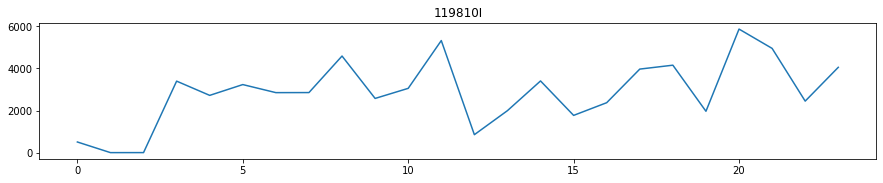

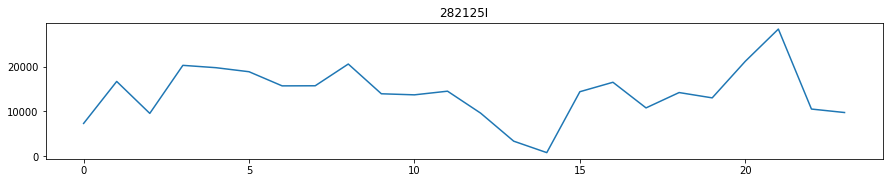

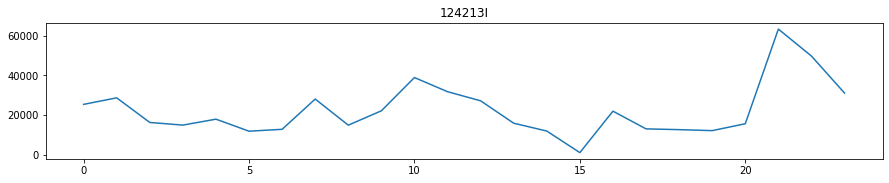

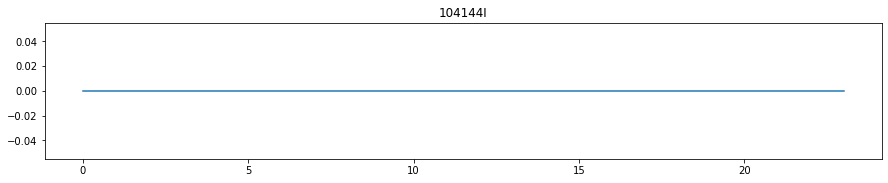

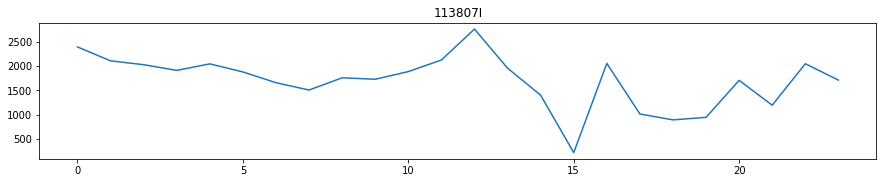

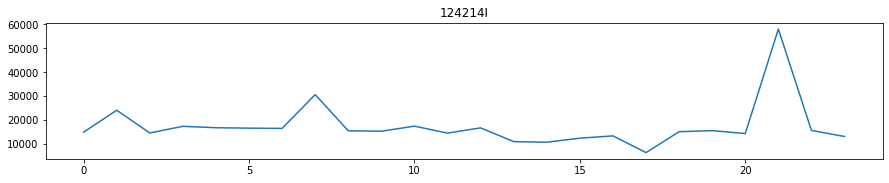

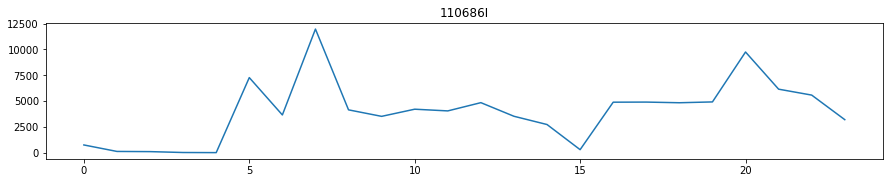

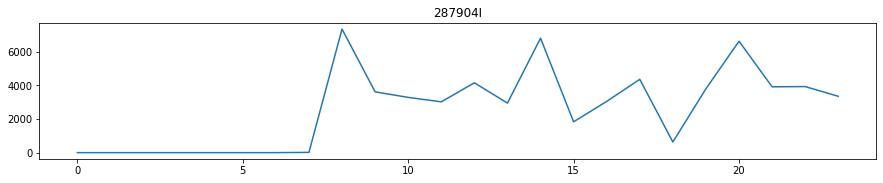

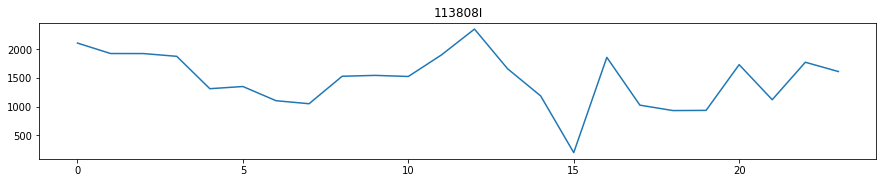

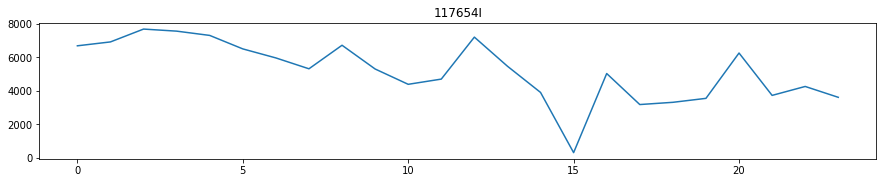

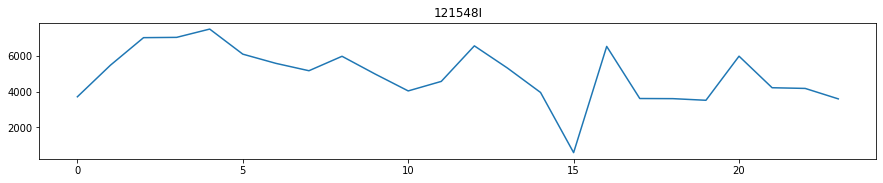

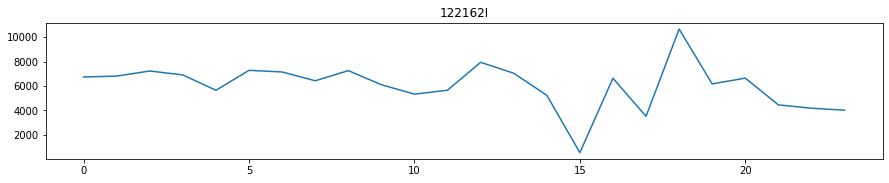

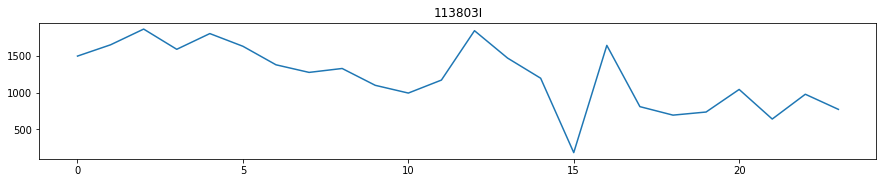

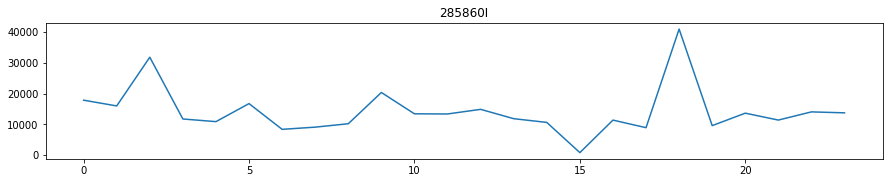

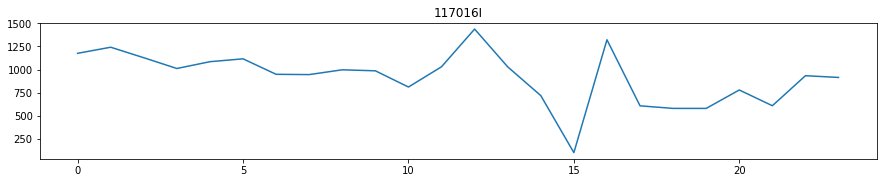

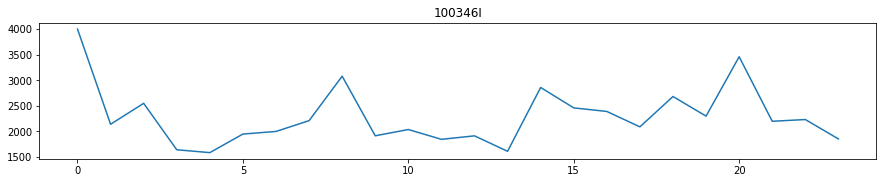

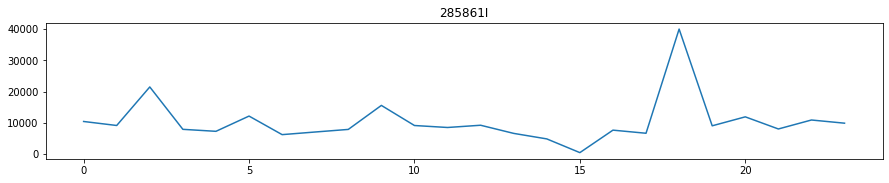

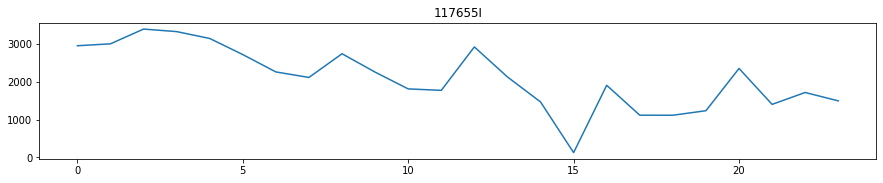

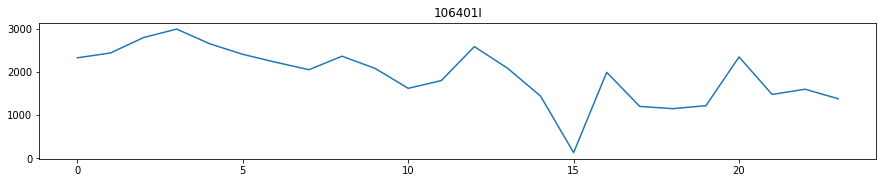

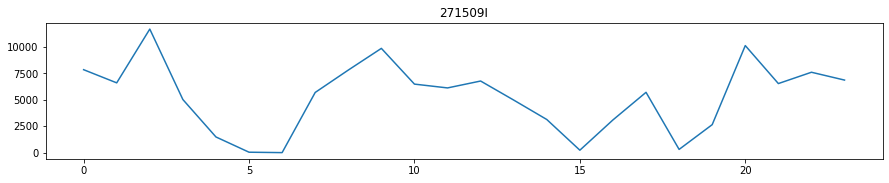

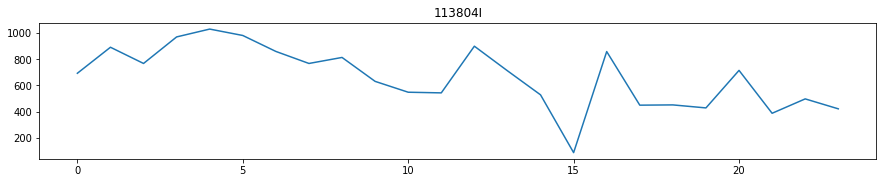

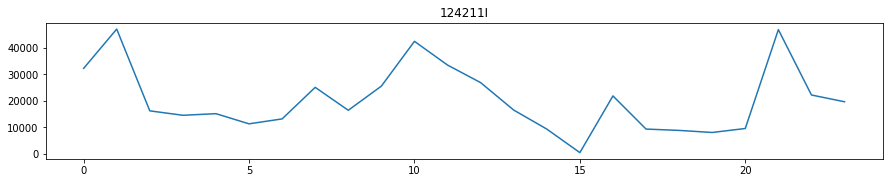

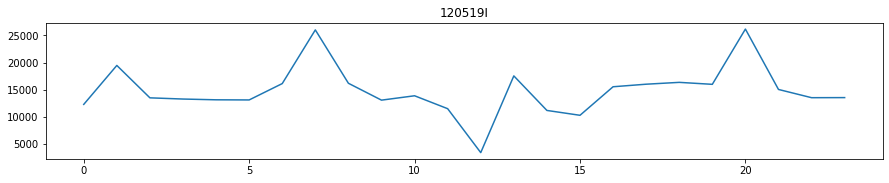

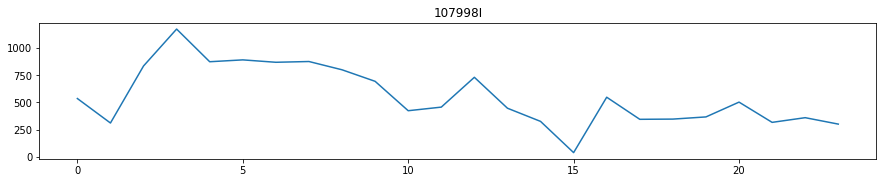

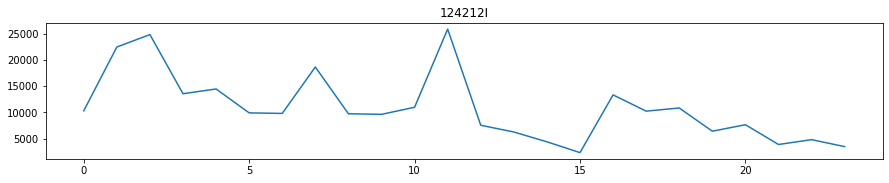

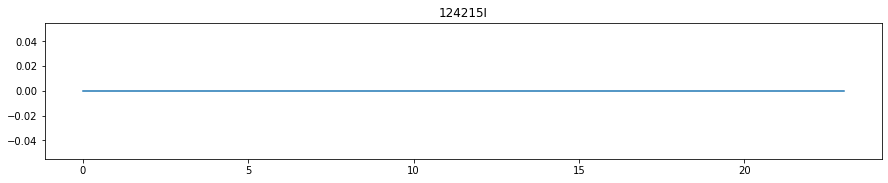

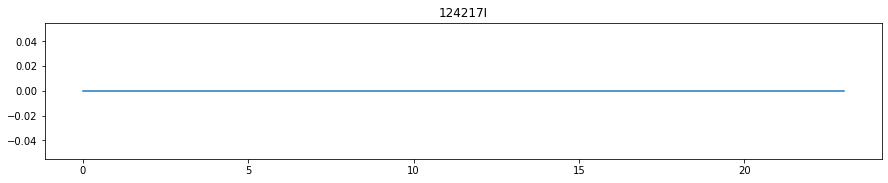

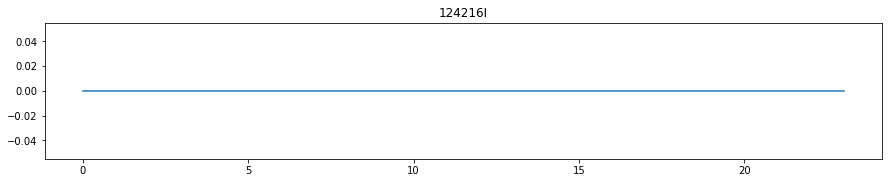

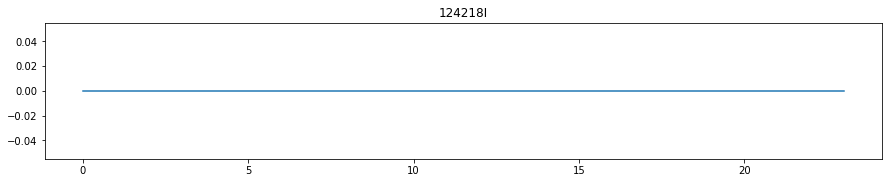

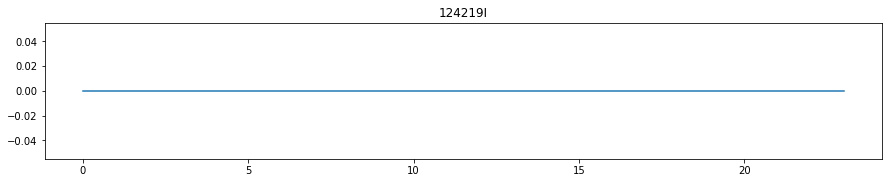

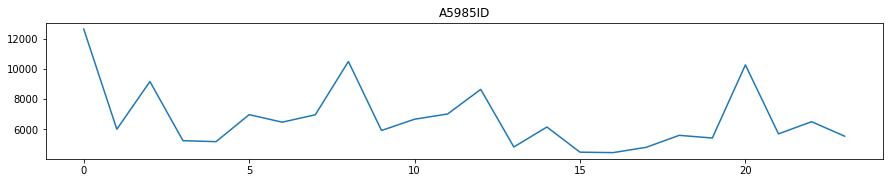

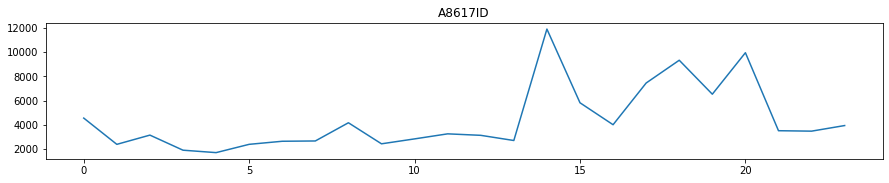

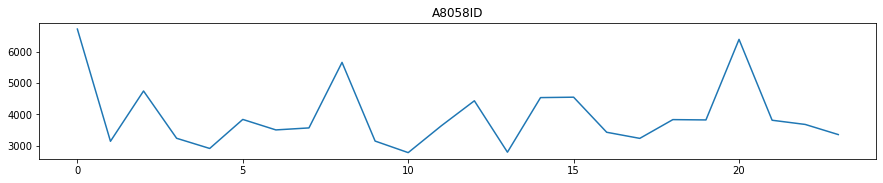

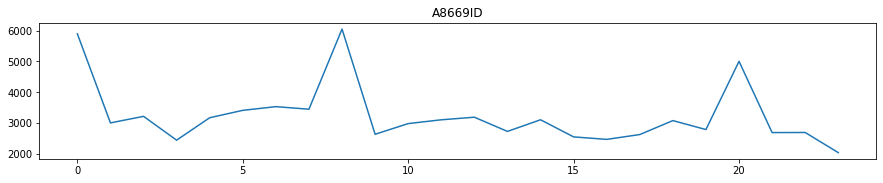

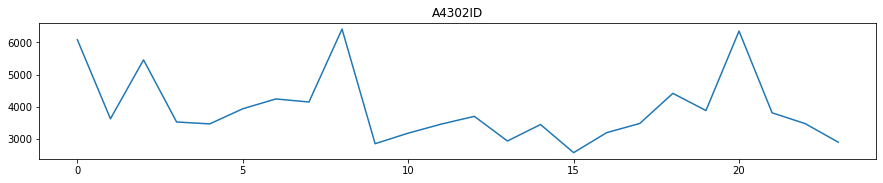

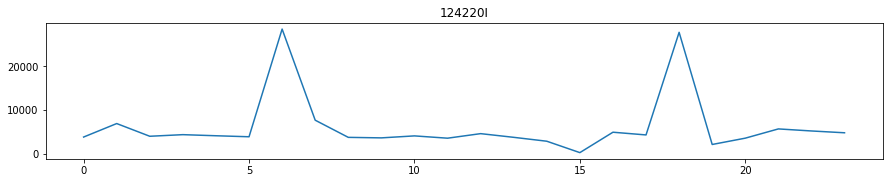

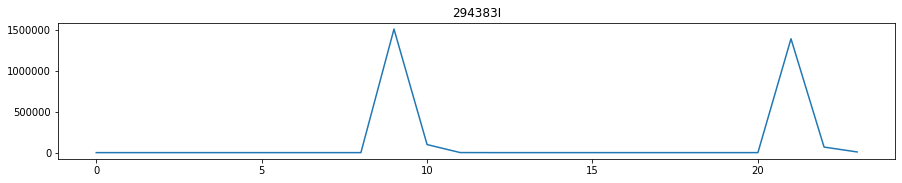

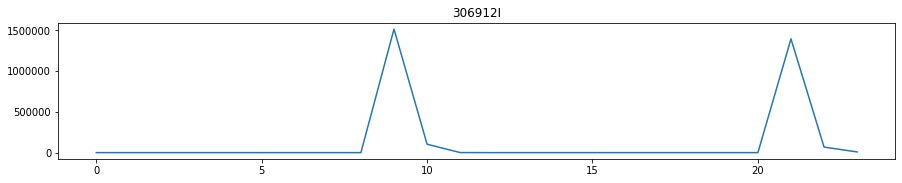

In [10]:
plot_all()

## Time Series Forecasting

In [11]:
import statsmodels.formula.api as smf

In [12]:
model = smf.ols('sales[sales.columns[1]] ~ sales.index', data=sales)

In [13]:
results = model.fit()

In [14]:
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     sales[sales.columns[1]]   R-squared:                       0.019
Model:                                 OLS   Adj. R-squared:                 -0.026
Method:                      Least Squares   F-statistic:                    0.4276
Date:                     Thu, 17 Jun 2021   Prob (F-statistic):              0.520
Time:                             12:58:58   Log-Likelihood:                -274.91
No. Observations:                       24   AIC:                             553.8
Df Residuals:                           22   BIC:                             556.2
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.565e+04   9434.717      3.779      0.001    1.61e+04    5.52e+04
sales.index   459.6261    702.897      0.654      0.520    -998.093    1917.345
==============================================================================
Omnibus:                       25.683   Durbin-Watson:                   2.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.988
Skew:                           2.257   Prob(JB):                     3.42e-09
Kurtosis:                       7.313   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Moving Averages

In [15]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [16]:
def PlotRollingMean(sales, i, p):
    """Plots rolling mean.

    sales: DataFrame of monthly sales
    """
    plt.figure(figsize=(15,2.5))
    thinkplot.plot(sales[sales.columns[i]], alpha=0.2, label=sales.columns[i])
    roll_mean = sales[sales.columns[i]].rolling(p).mean()
    thinkplot.Plot(roll_mean, label='rolling mean', color='#ff7f00')
    thinkplot.Config(ylabel='monthly sales', xlabel ='Month')

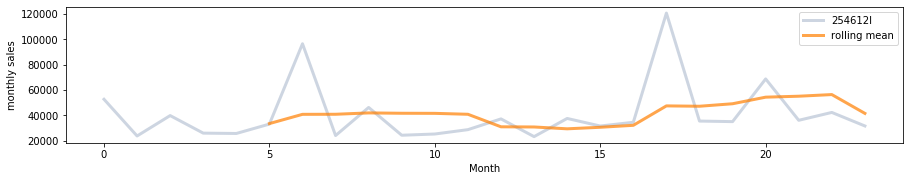

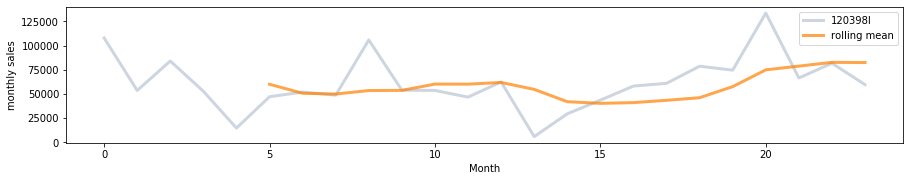

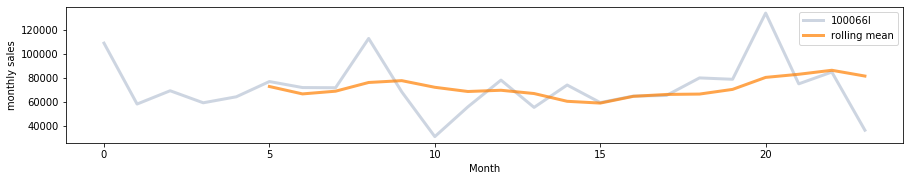

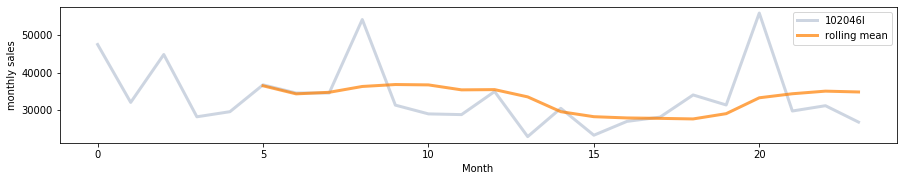

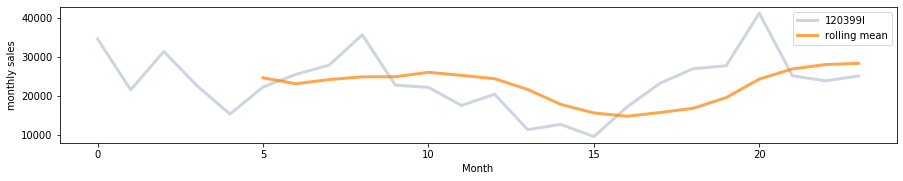

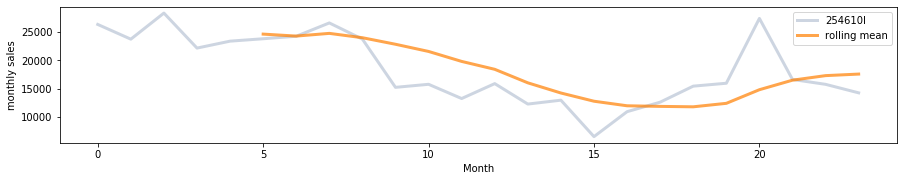

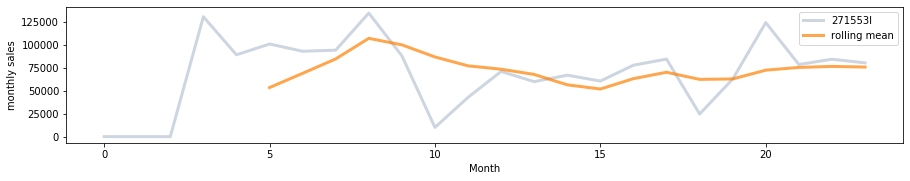

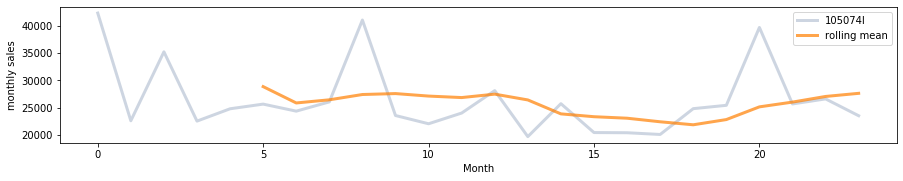

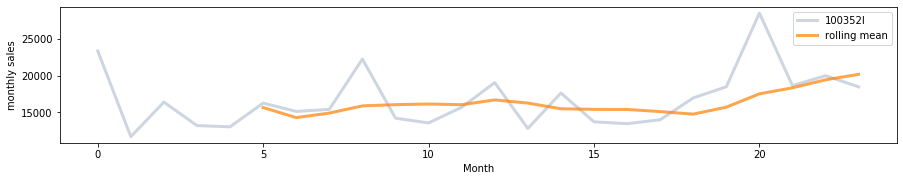

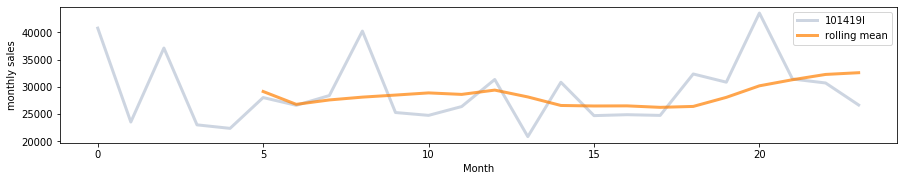

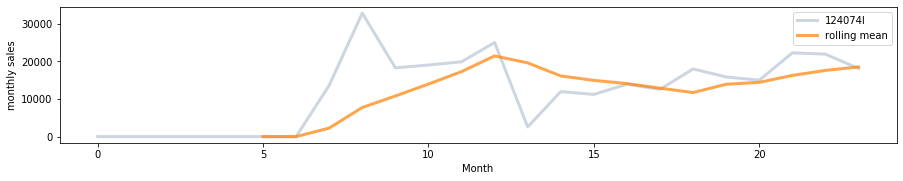

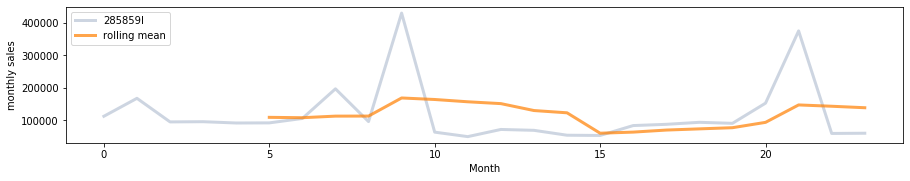

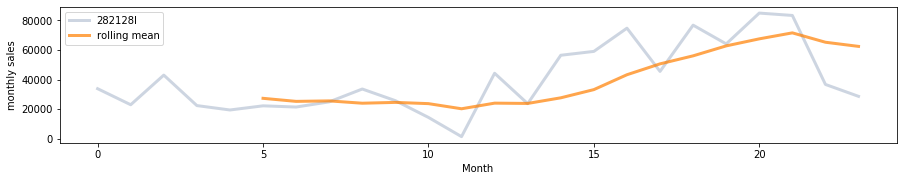

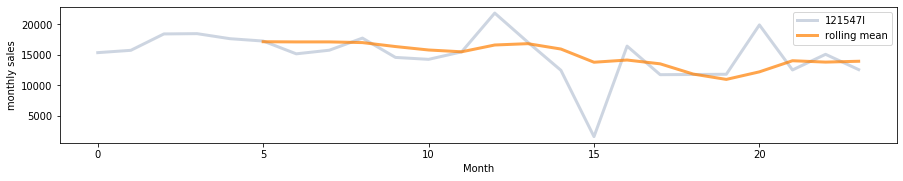

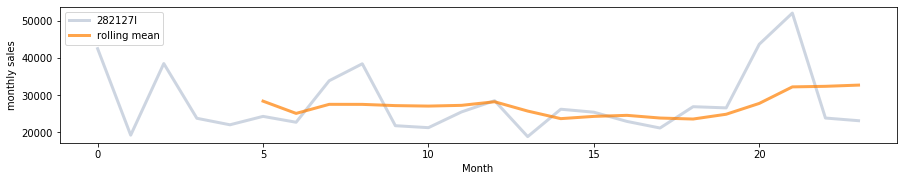

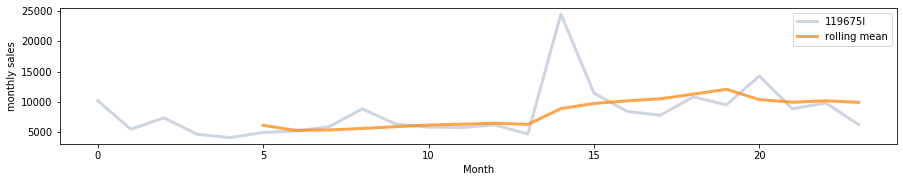

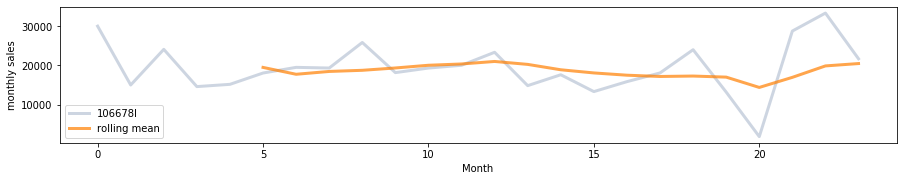

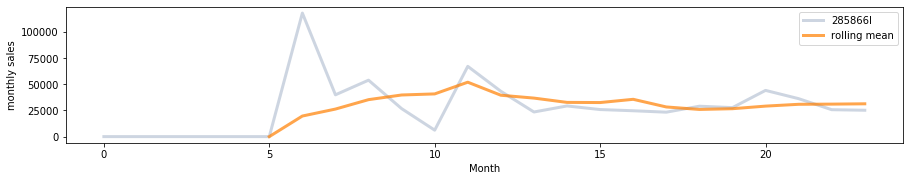

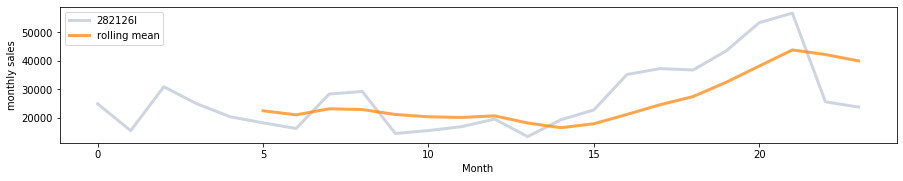

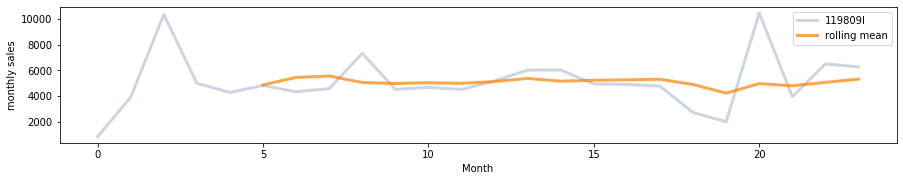

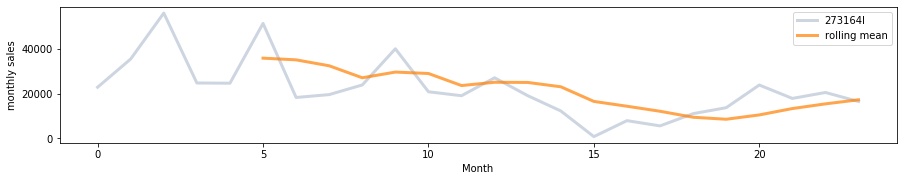

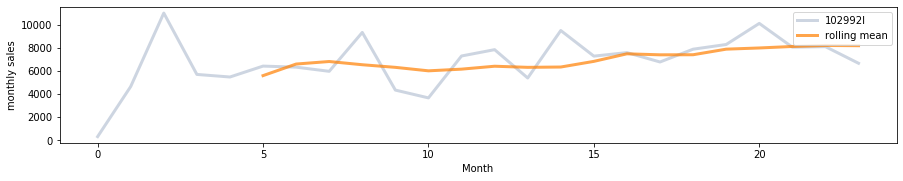

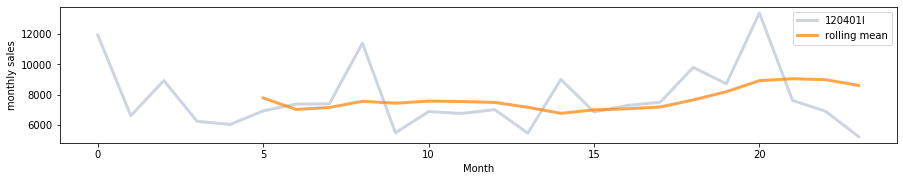

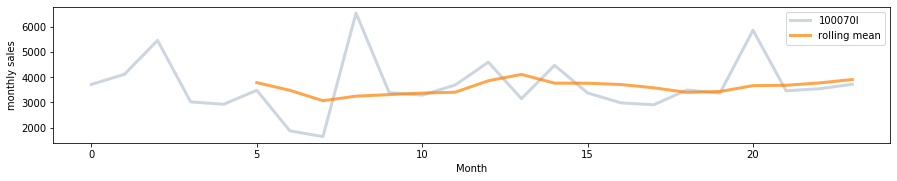

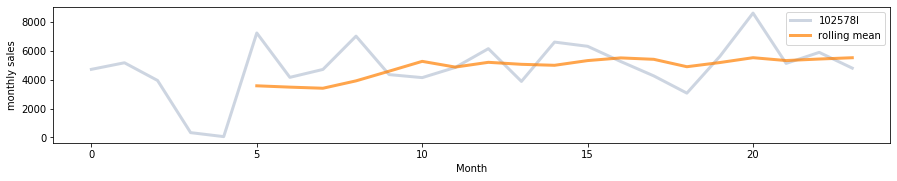

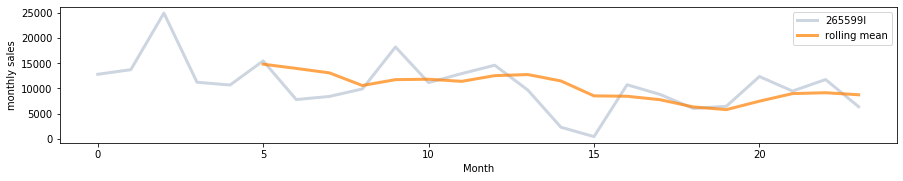

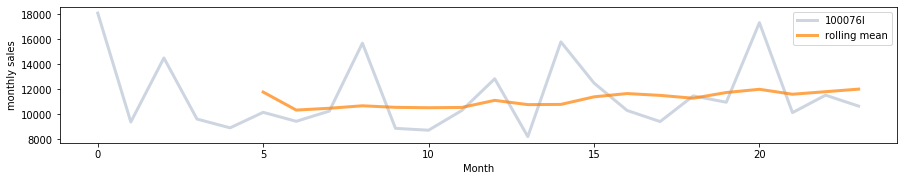

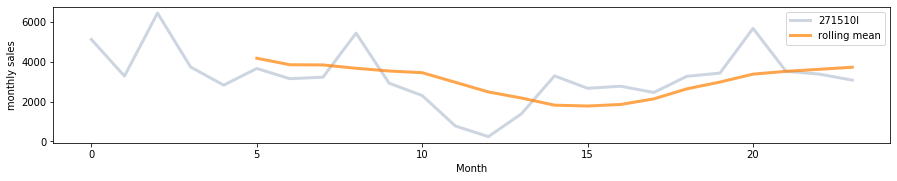

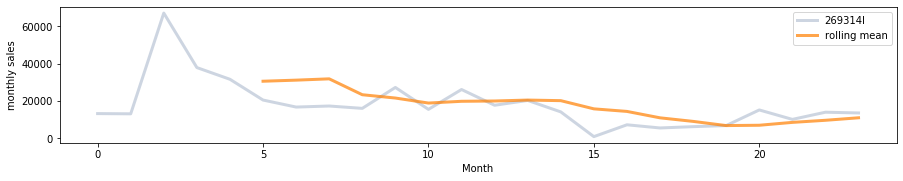

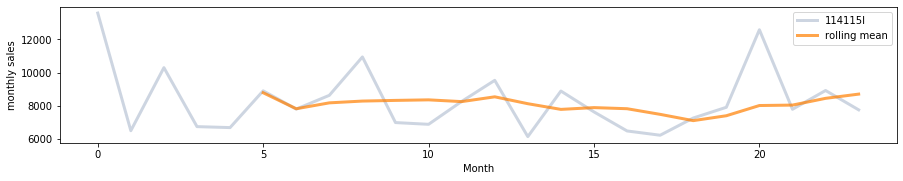

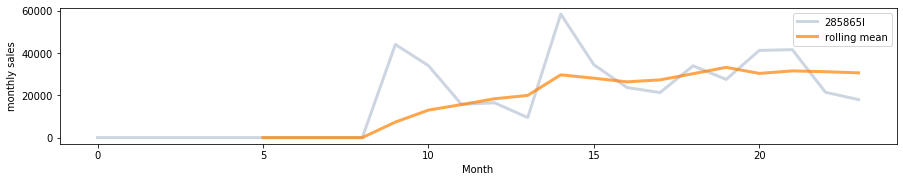

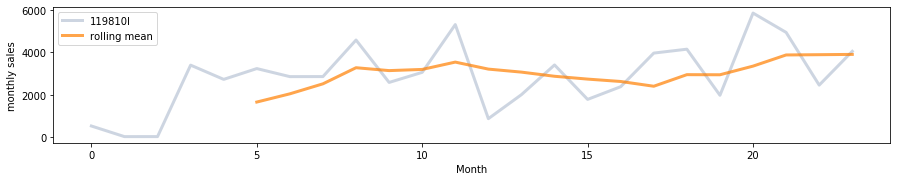

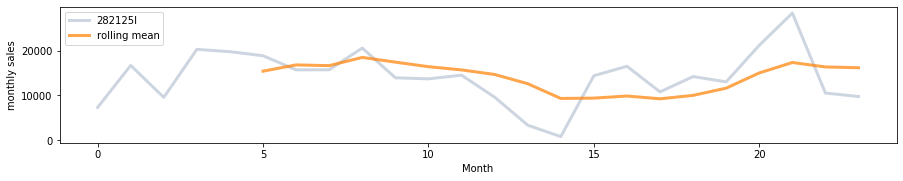

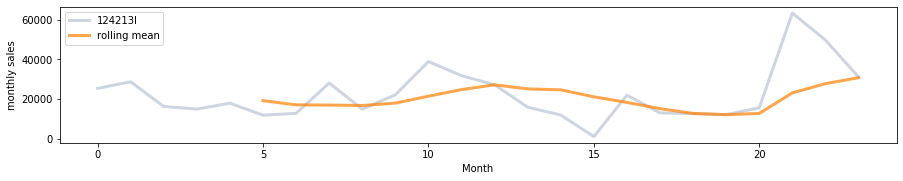

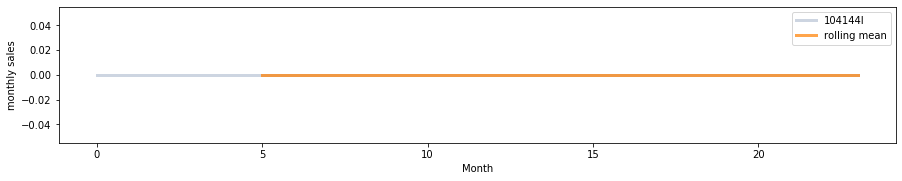

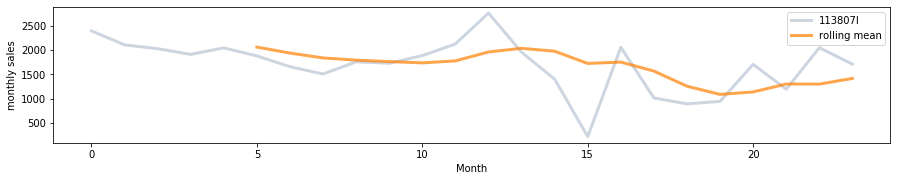

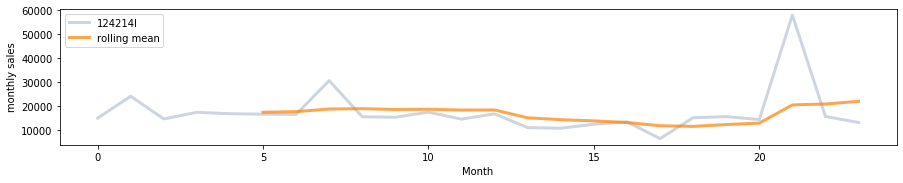

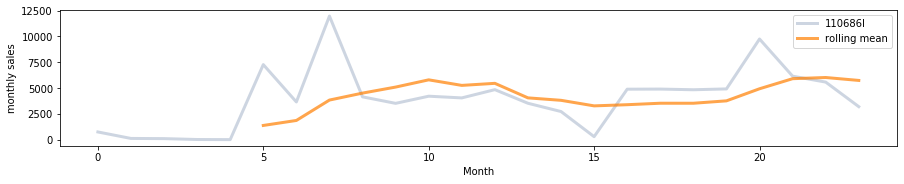

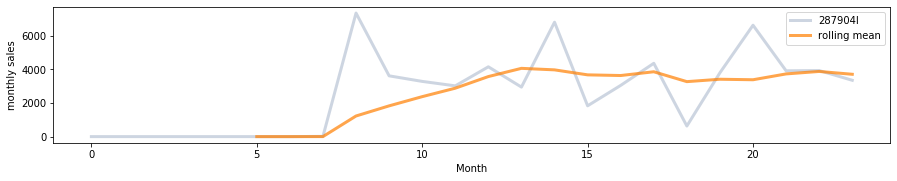

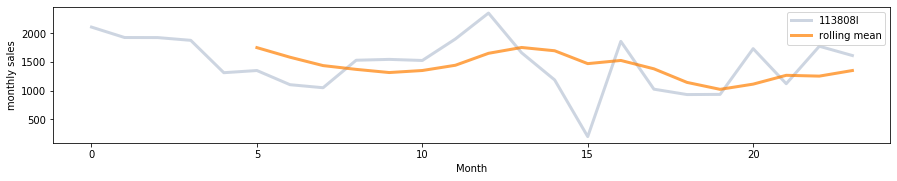

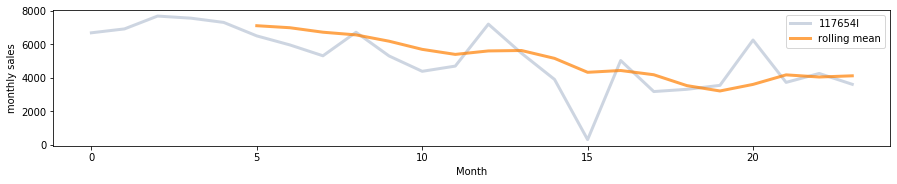

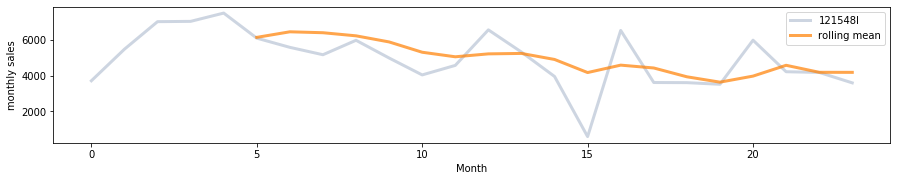

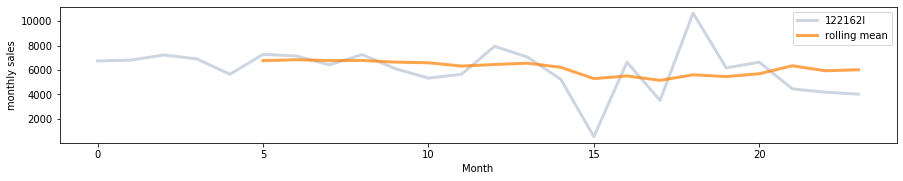

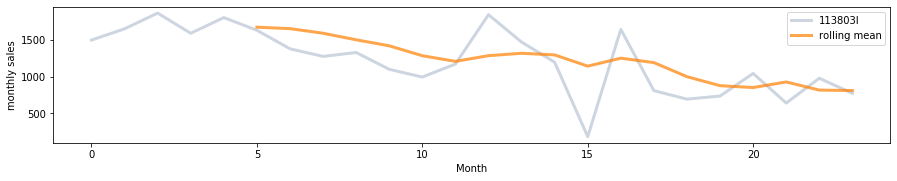

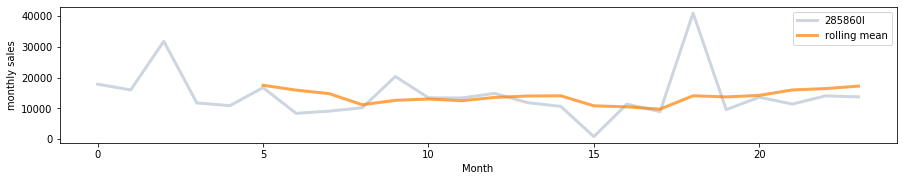

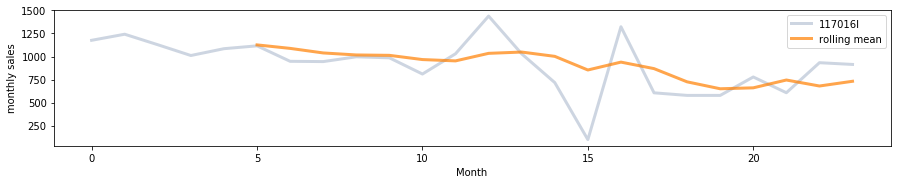

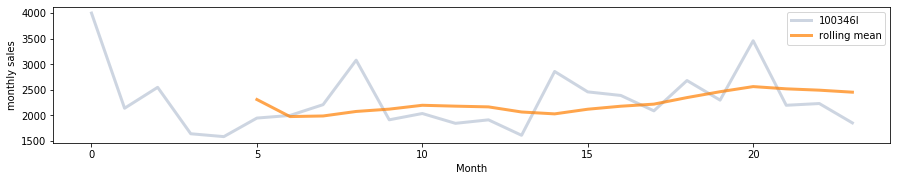

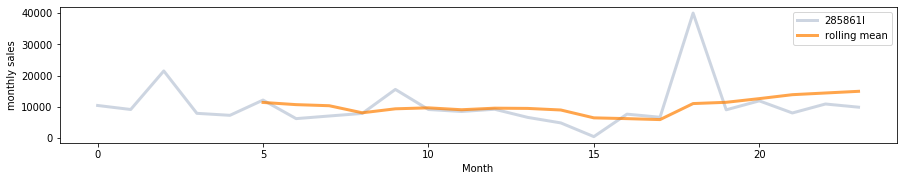

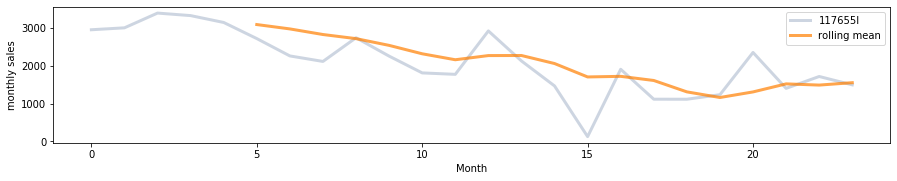

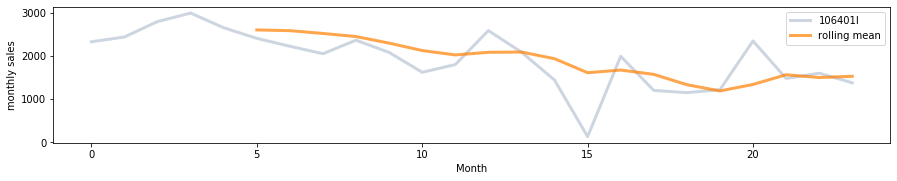

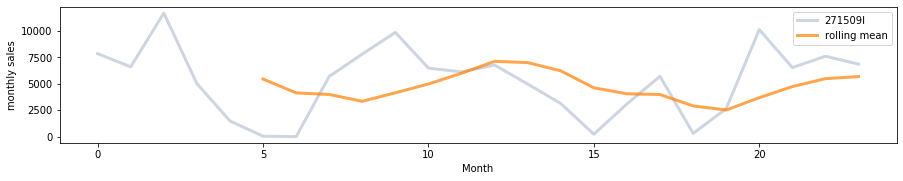

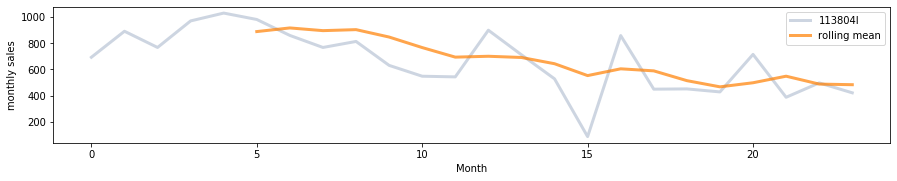

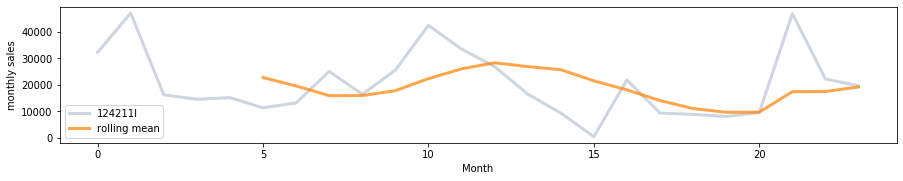

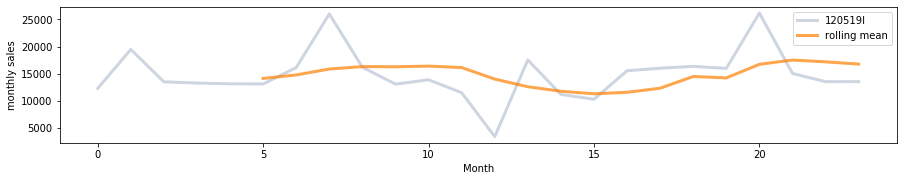

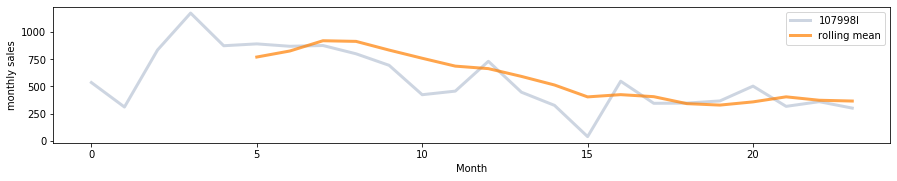

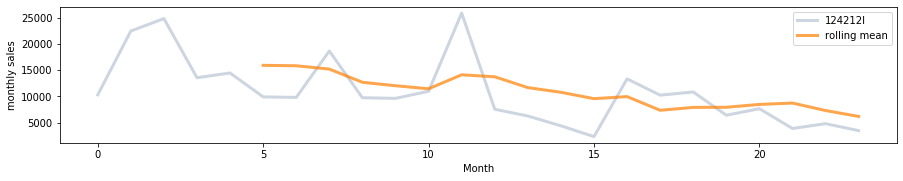

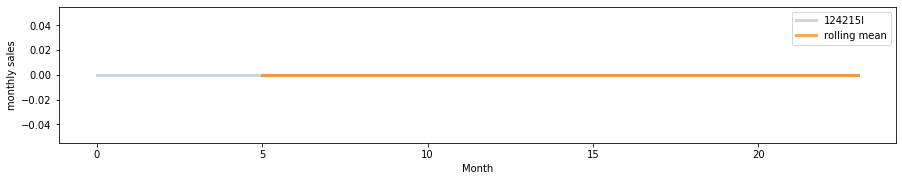

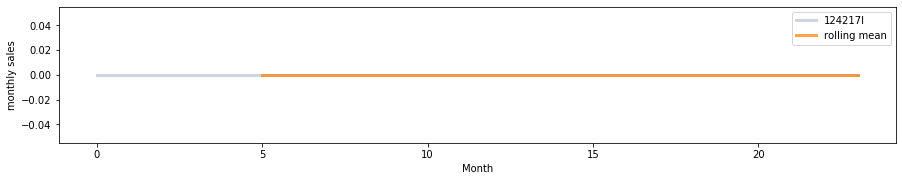

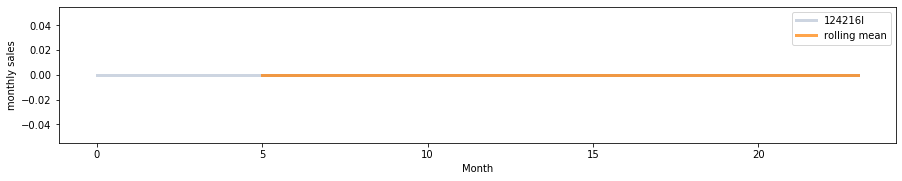

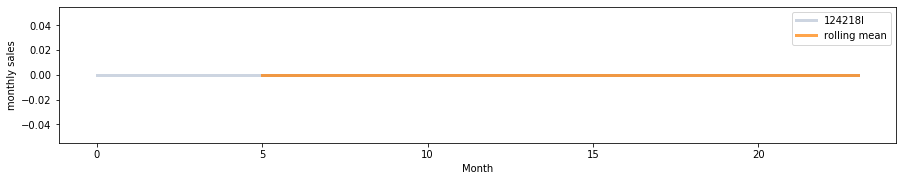

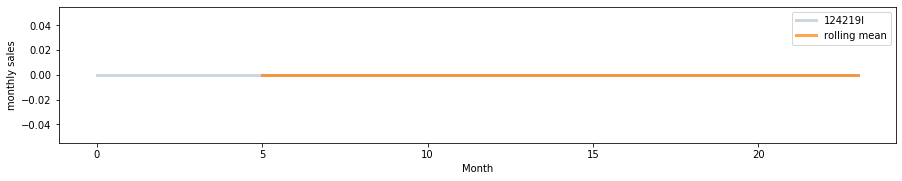

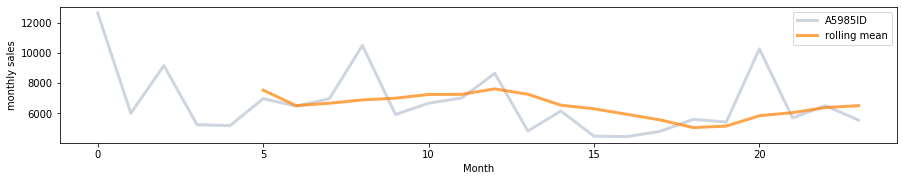

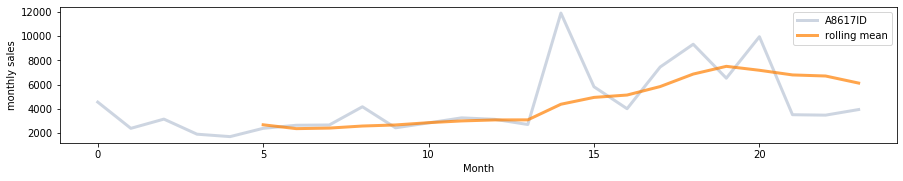

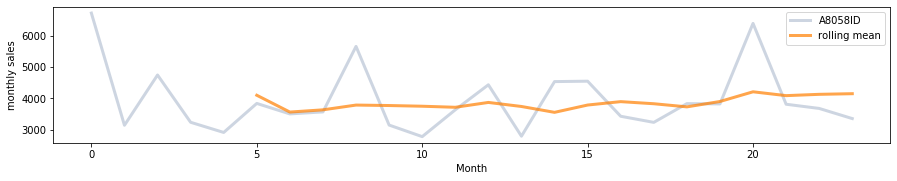

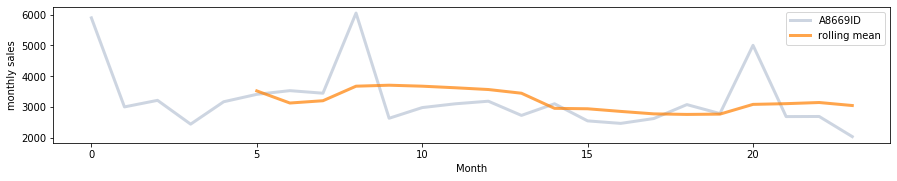

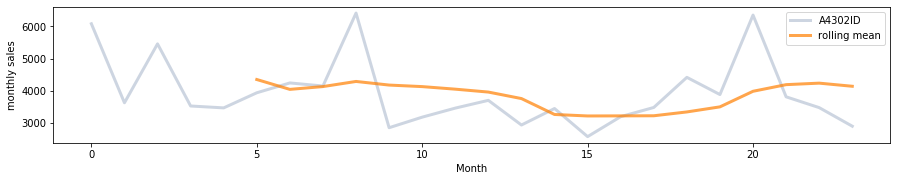

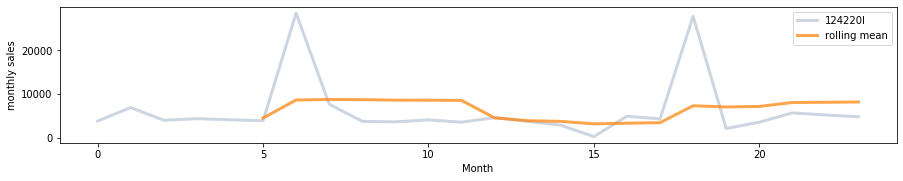

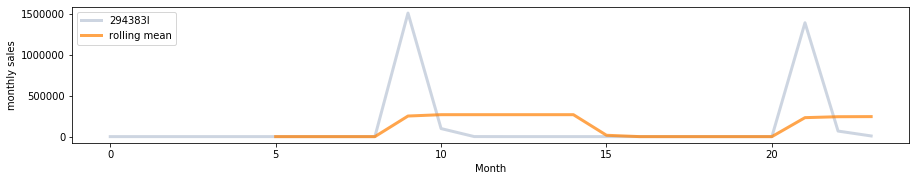

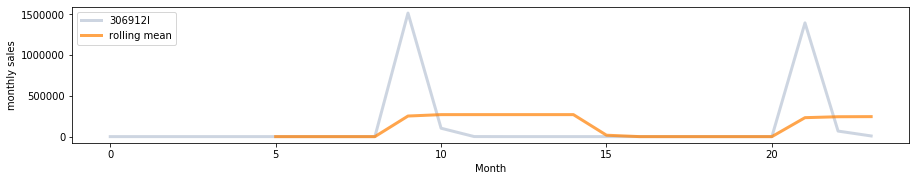

In [17]:
for i in range(1,70):
    PlotRollingMean(sales,i,6)

### EWMA

In [18]:
def PlotEWMA(sales, i, p):
    """Plots rolling mean.

    sales: DataFrame of monthly sales
    """
    plt.figure(figsize=(15,2.5))
    thinkplot.plot(sales[sales.columns[i]], alpha=0.2, label=sales.columns[i])
    roll_mean = sales[sales.columns[i]].ewm(p).mean()
    thinkplot.Plot(roll_mean, label='EWMA', color='#ff7f00')
    thinkplot.Config(ylabel='Monthly Sales', xlabel = 'Month')

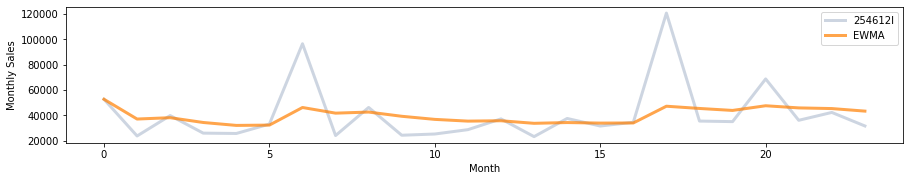

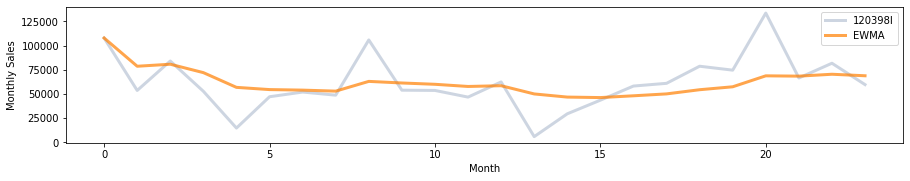

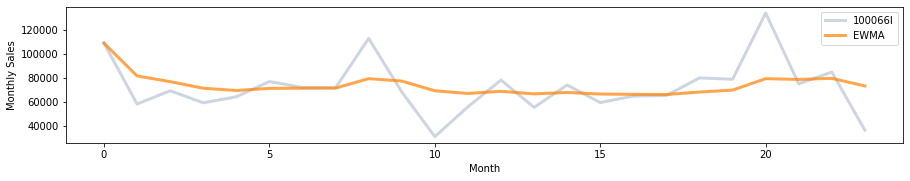

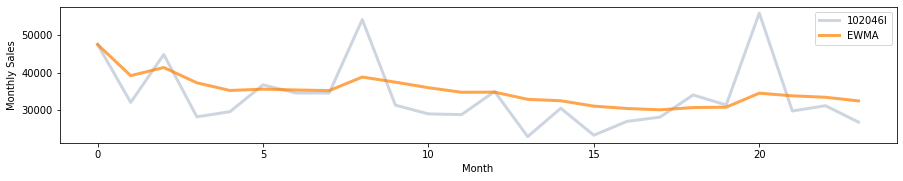

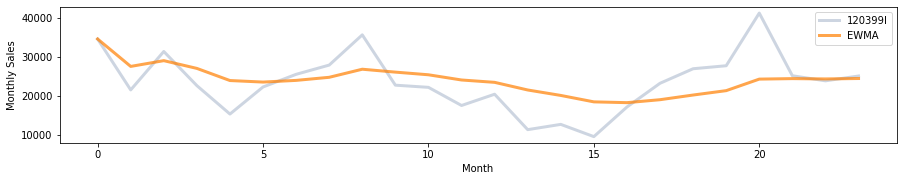

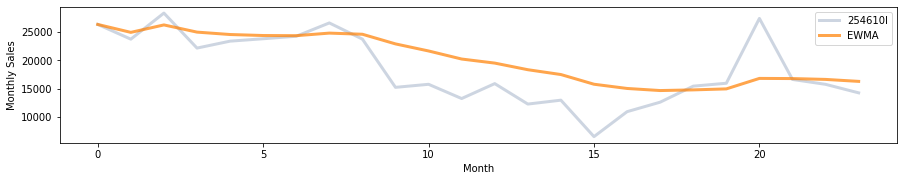

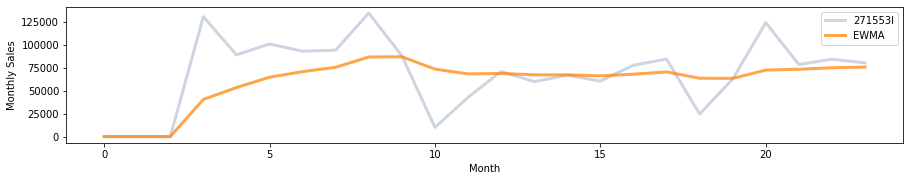

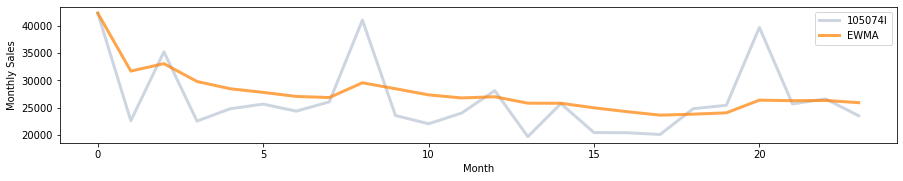

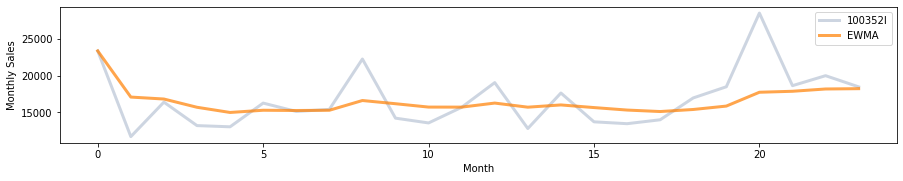

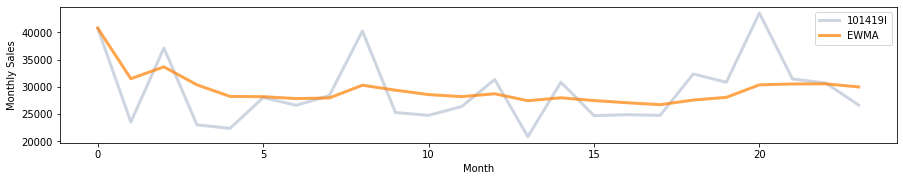

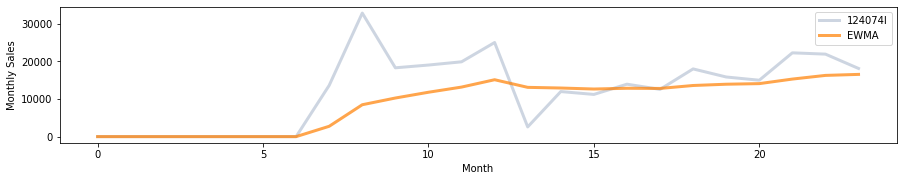

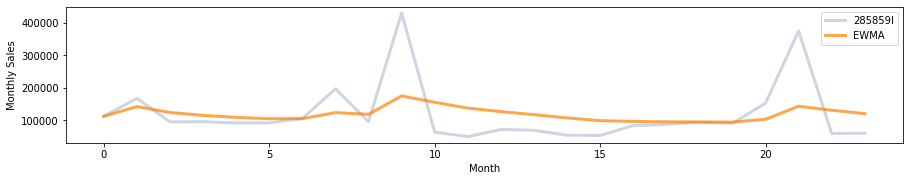

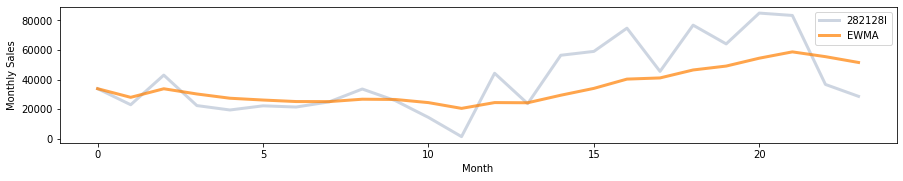

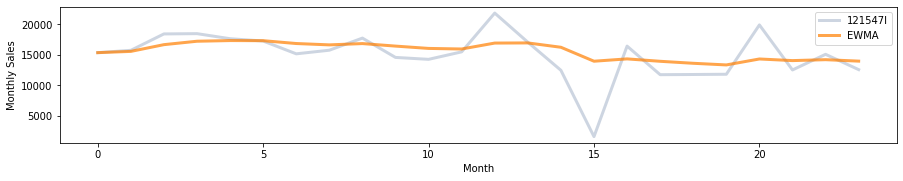

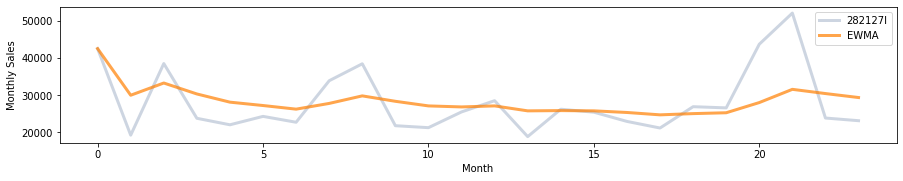

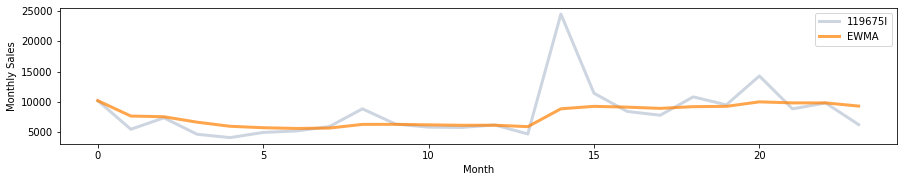

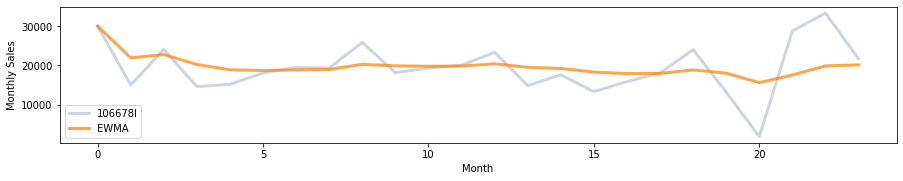

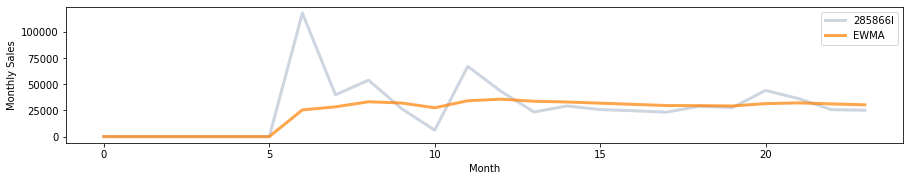

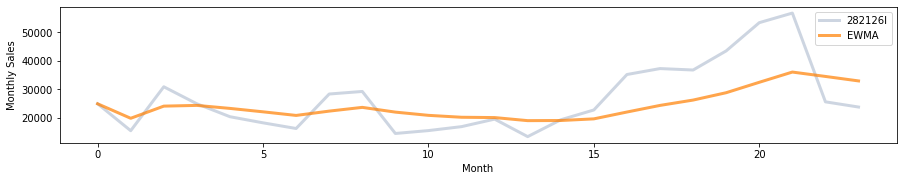

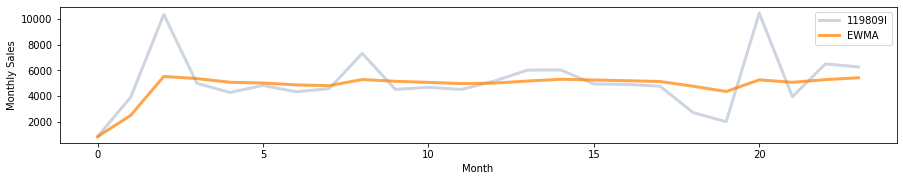

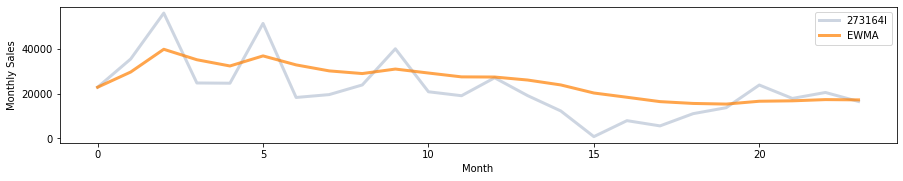

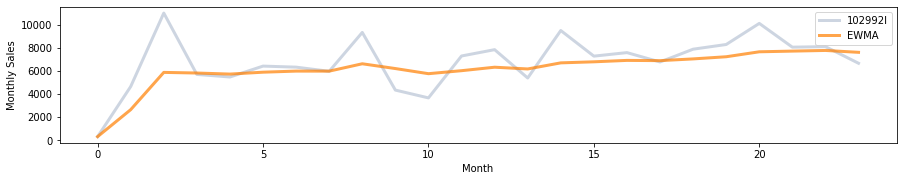

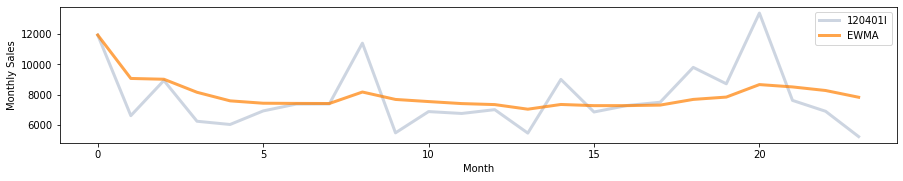

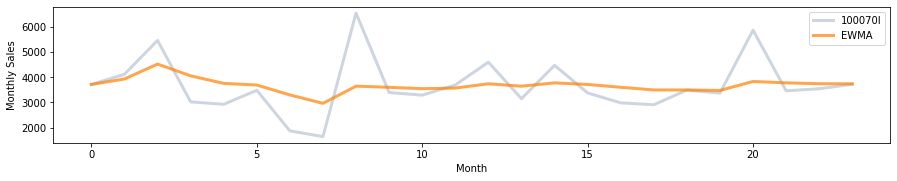

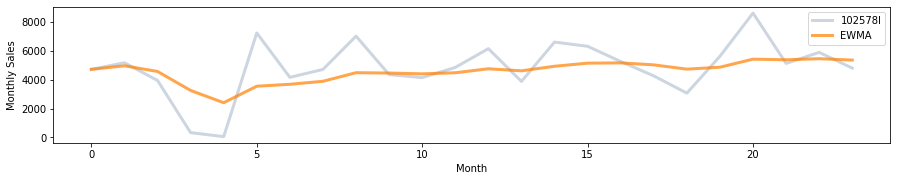

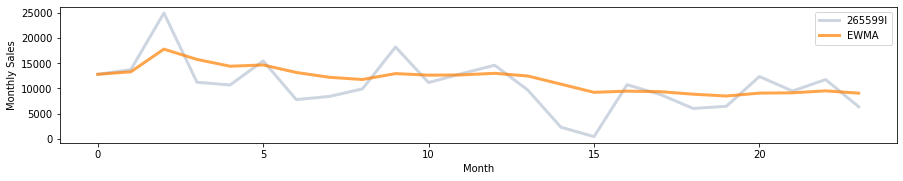

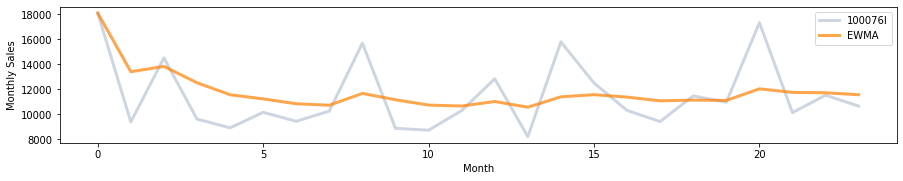

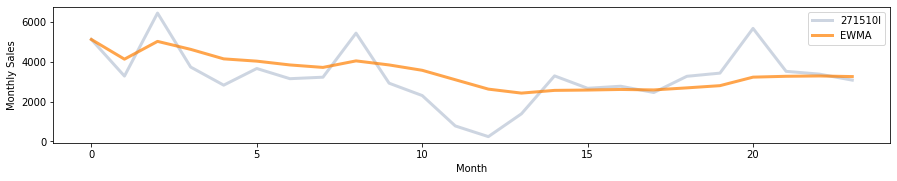

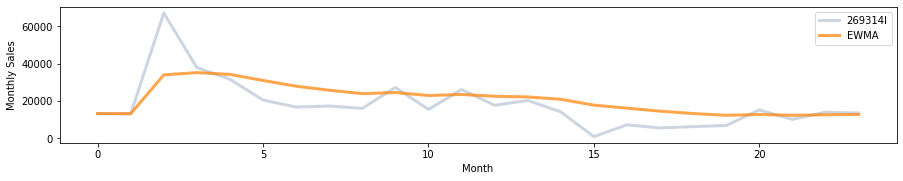

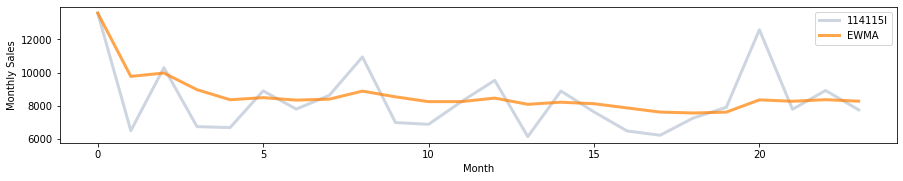

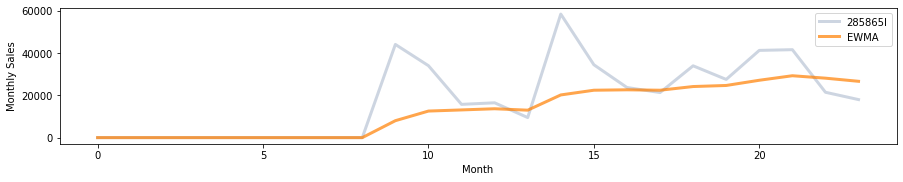

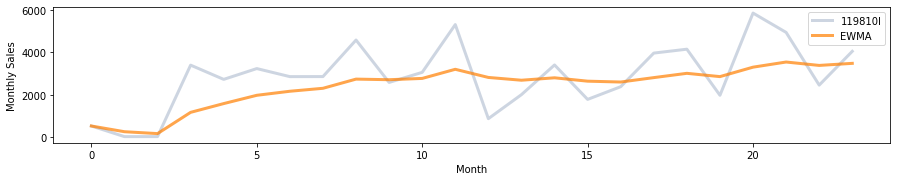

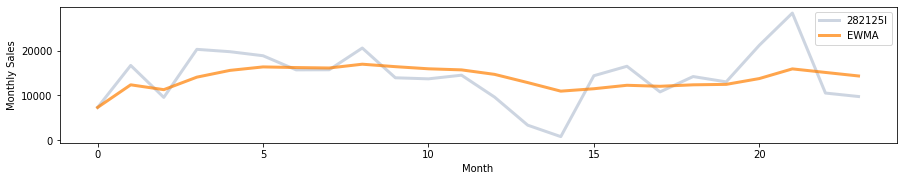

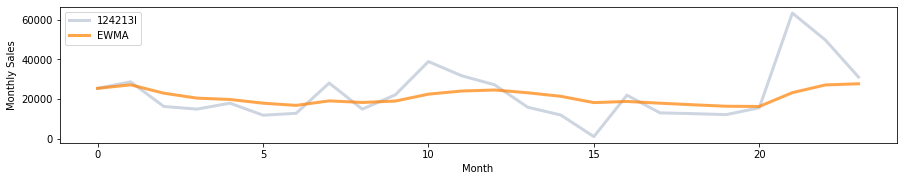

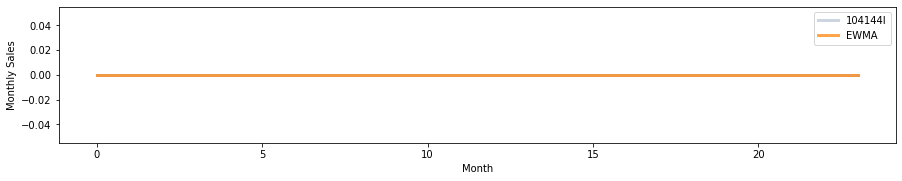

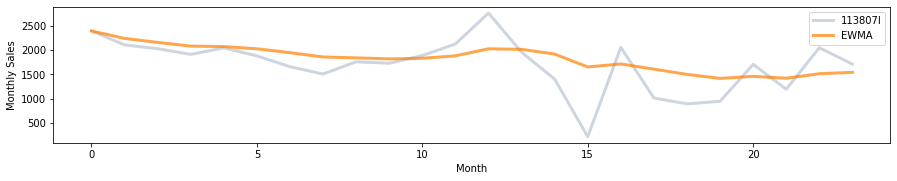

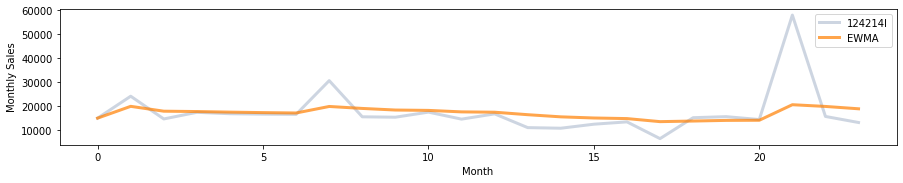

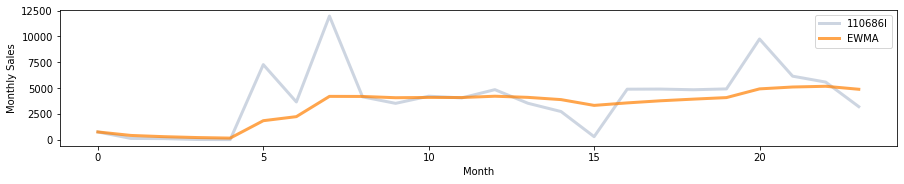

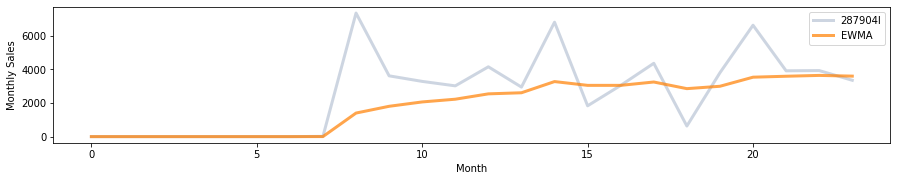

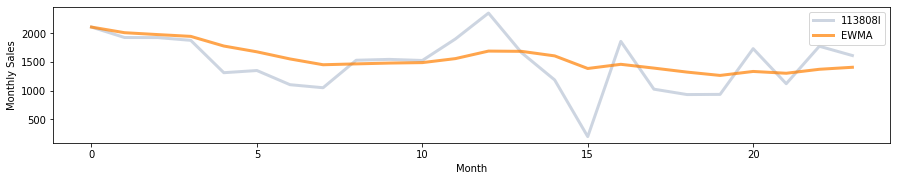

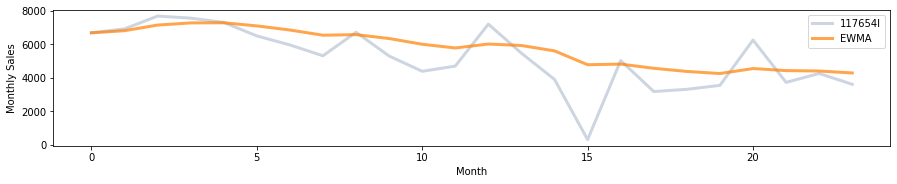

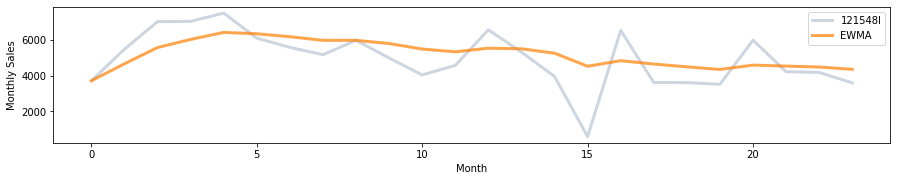

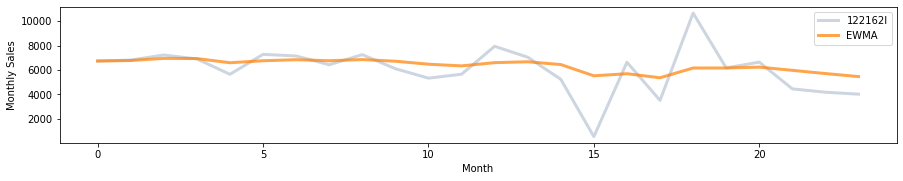

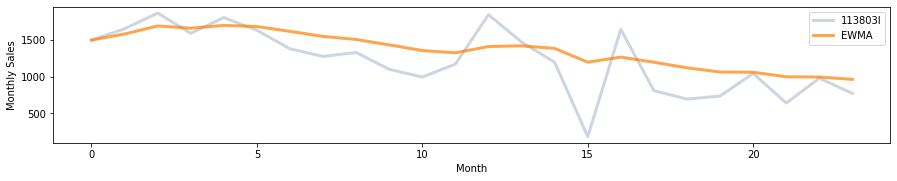

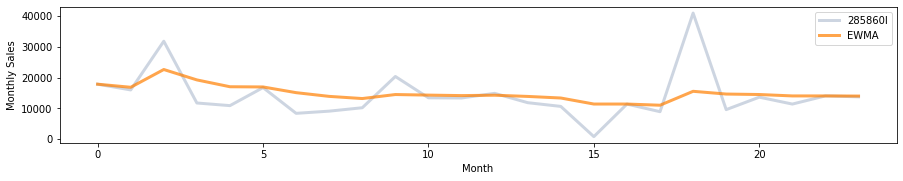

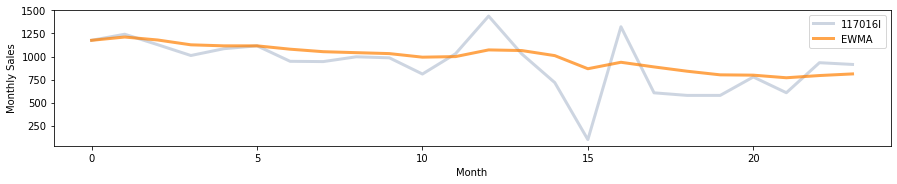

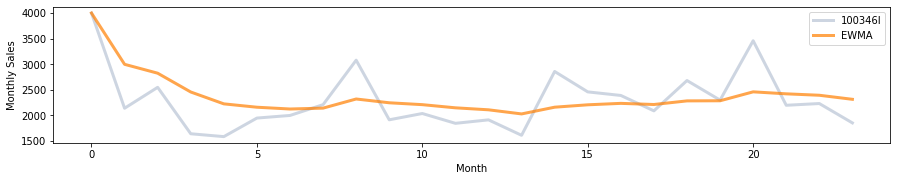

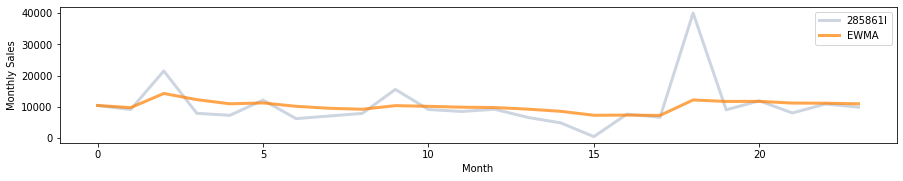

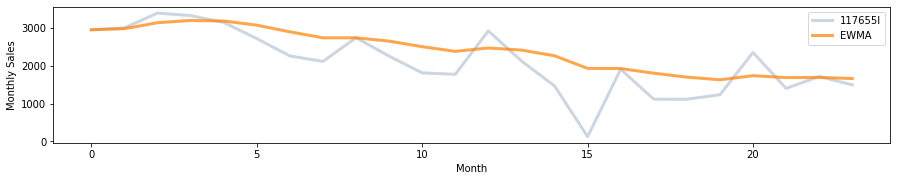

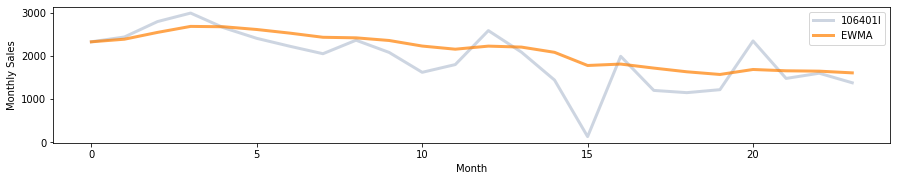

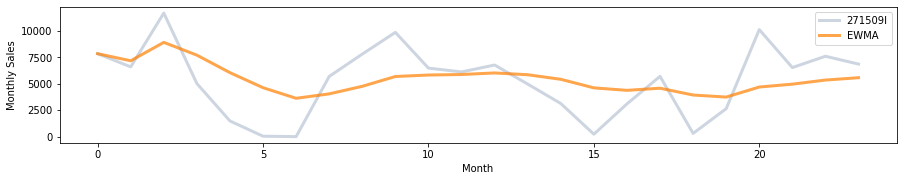

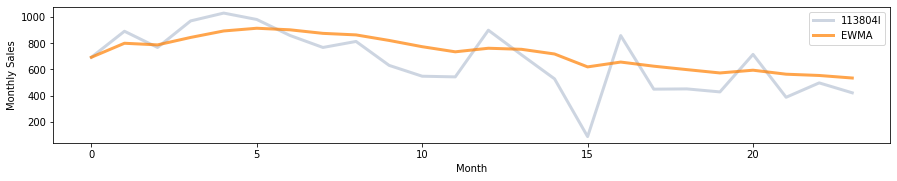

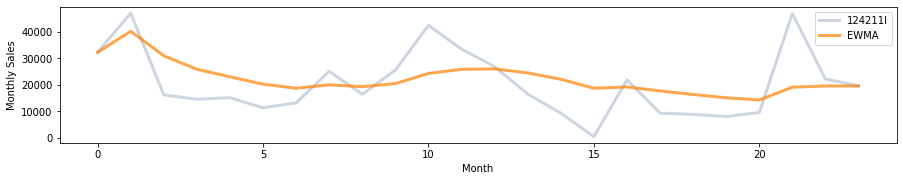

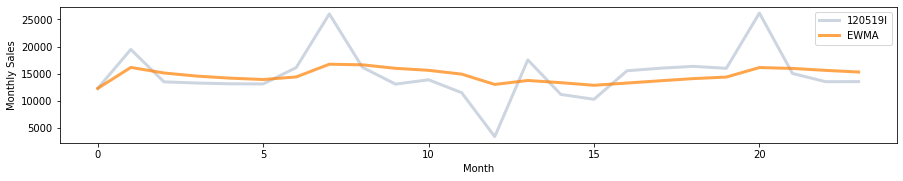

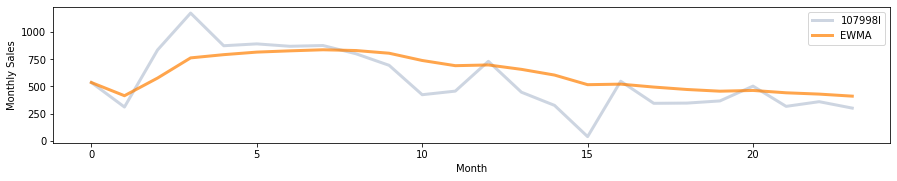

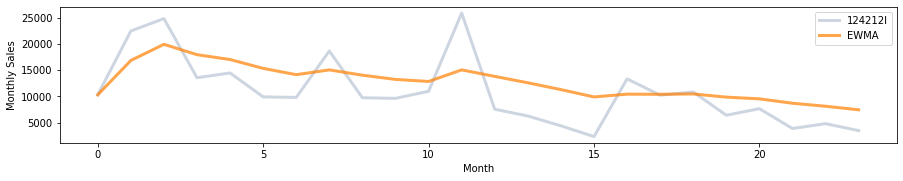

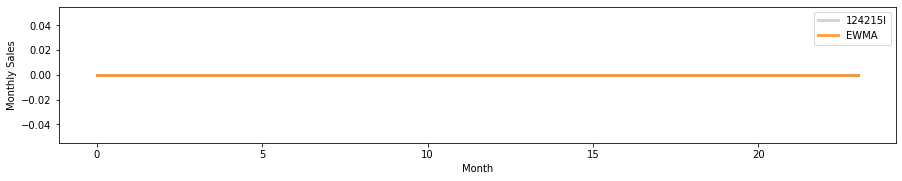

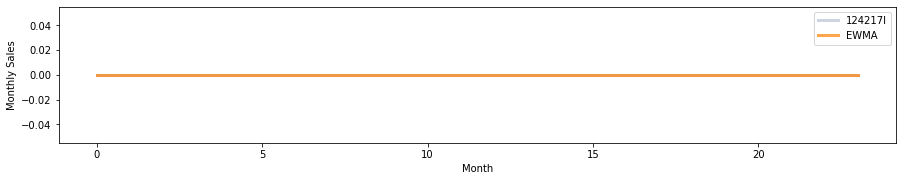

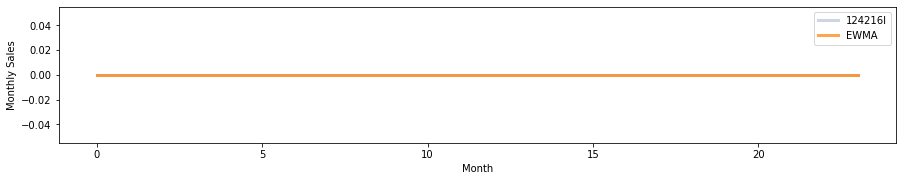

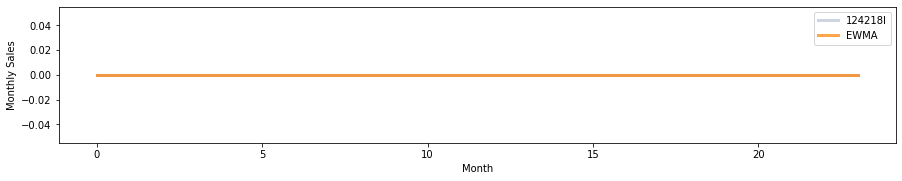

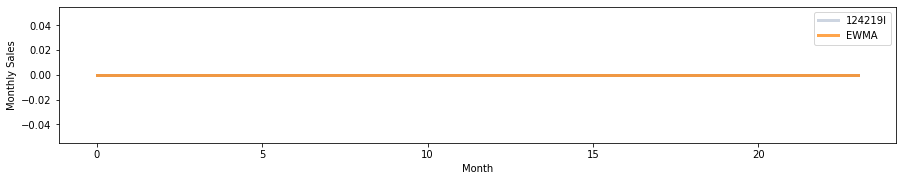

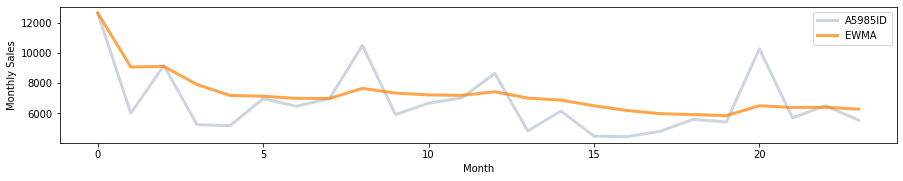

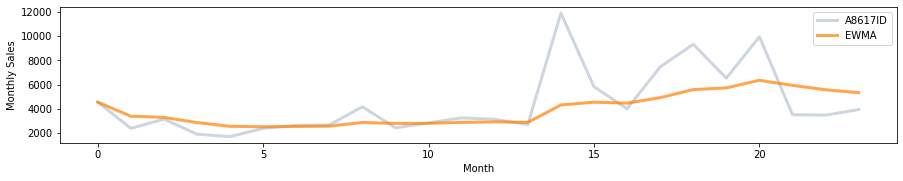

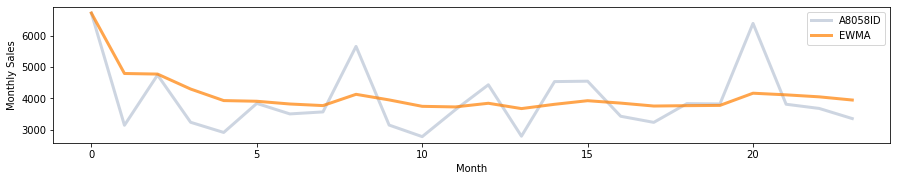

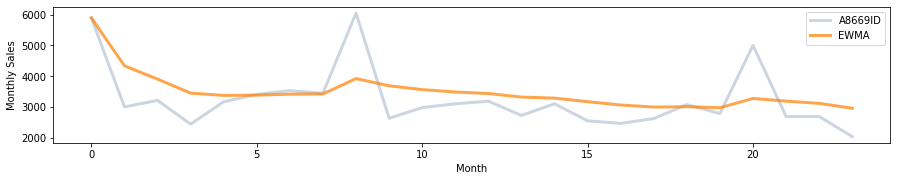

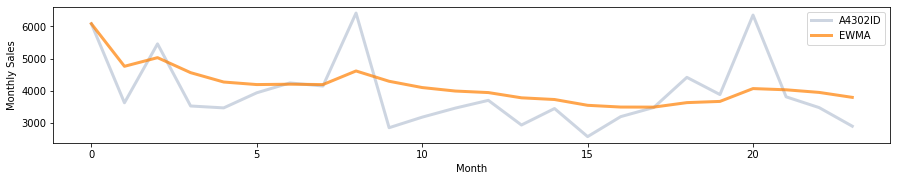

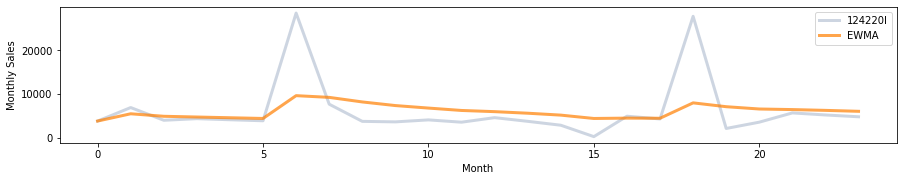

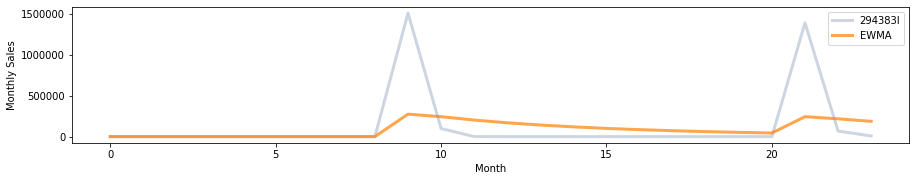

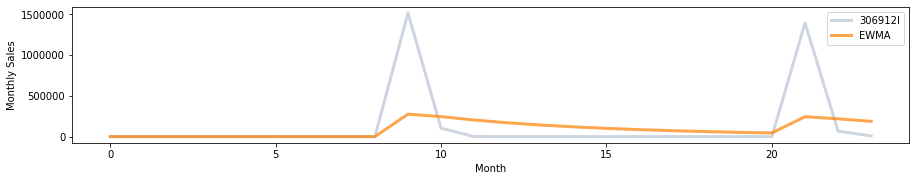

In [19]:
for i in range(1,70):
    PlotEWMA(sales,i,6)

In [20]:
def Series_Corr(i):
    corr = {}
    for lag in range(1,13):
        xs = sales.index[lag:]
        ys = sales[sales.columns[i]].shift(lag)[lag:]
        corr[lag] = thinkstats2.Corr(xs,ys)
    for key, value in corr.items():
        if abs(value) == max([abs(x) for x in corr.values()]):
            print(sales.columns[i],'\t', 'Max Corr:', key,'\t\t', value)
            Predict[sales.columns[i]] = key

In [21]:
Predict = {}
for i in range(1,70):
    Series_Corr(i)

254612I 	 Max Corr: 3 		 0.21895978283719839
120398I 	 Max Corr: 9 		 -0.4432232367948148
100066I 	 Max Corr: 12 		 -0.3118771428488621
102046I 	 Max Corr: 6 		 -0.5357597954455818
120399I 	 Max Corr: 7 		 -0.647008355504362
254610I 	 Max Corr: 7 		 -0.8939312535478842
271553I 	 Max Corr: 12 		 0.2937390386719285
105074I 	 Max Corr: 6 		 -0.5130106629533917
100352I 	 Max Corr: 1 		 0.28638528422033305
101419I 	 Max Corr: 6 		 -0.32083534081370985
124074I 	 Max Corr: 11 		 0.8246805285104468
285859I 	 Max Corr: 4 		 -0.218318677046542
282128I 	 Max Corr: 2 		 0.7358565183085217
121547I 	 Max Corr: 4 		 -0.48465628793315313
282127I 	 Max Corr: 6 		 -0.38158746126971815
119675I 	 Max Corr: 3 		 0.4443544492270701
106678I 	 Max Corr: 3 		 -0.4440590718429952
285866I 	 Max Corr: 11 		 0.4992508603211207
282126I 	 Max Corr: 2 		 0.626681353957888
119809I 	 Max Corr: 9 		 0.19733019481829658
273164I 	 Max Corr: 5 		 -0.6835209078797294
102992I 	 Max Corr: 1 		 0.48755987597655764
120401I 	 Ma

C:\ProgramData\Anaconda3\lib\site-packages\thinkstats2.py:2589: RuntimeWarning: invalid value encountered in double_scalars
  corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)


 	 Max Corr: 8 		 -0.5042012597830275
117655I 	 Max Corr: 12 		 -0.8472522141072402
106401I 	 Max Corr: 4 		 -0.7545662523826179
271509I 	 Max Corr: 4 		 -0.3651605095232749
113804I 	 Max Corr: 4 		 -0.6470363885421891
124211I 	 Max Corr: 3 		 -0.4712903733160412
120519I 	 Max Corr: 11 		 -0.30964962276292723
107998I 	 Max Corr: 1 		 -0.6134194202820256
124212I 	 Max Corr: 1 		 -0.5793984716670832
A5985ID 	 Max Corr: 4 		 -0.5189913648724682
A8617ID 	 Max Corr: 3 		 0.6838579109795033
A8058ID 	 Max Corr: 12 		 -0.3631659404726452
A8669ID 	 Max Corr: 6 		 -0.41612719434561707
A4302ID 	 Max Corr: 7 		 -0.556095303973405
124220I 	 Max Corr: 8 		 -0.20857002204457092
294383I 	 Max Corr: 12 		 0.33281633691374146
306912I 	 Max Corr: 12 		 0.3339508725622029


In [22]:
Predict

{'254612I': 3,
 '120398I': 9,
 '100066I': 12,
 '102046I': 6,
 '120399I': 7,
 '254610I': 7,
 '271553I': 12,
 '105074I': 6,
 '100352I': 1,
 '101419I': 6,
 '124074I': 11,
 '285859I': 4,
 '282128I': 2,
 '121547I': 4,
 '282127I': 6,
 '119675I': 3,
 '106678I': 3,
 '285866I': 11,
 '282126I': 2,
 '119809I': 9,
 '273164I': 5,
 '102992I': 1,
 '120401I': 10,
 '100070I': 4,
 '102578I': 8,
 '265599I': 4,
 '100076I': 12,
 '271510I': 10,
 '269314I': 4,
 '114115I': 5,
 '285865I': 2,
 '119810I': 12,
 '282125I': 9,
 '124213I': 11,
 '113807I': 4,
 '124214I': 6,
 '110686I': 12,
 '287904I': 9,
 '113808I': 4,
 '117654I': 12,
 '121548I': 4,
 '122162I': 12,
 '113803I': 12,
 '285860I': 6,
 '117016I': 12,
 '100346I': 10,
 '285861I': 8,
 '117655I': 12,
 '106401I': 4,
 '271509I': 4,
 '113804I': 4,
 '124211I': 3,
 '120519I': 11,
 '107998I': 1,
 '124212I': 1,
 'A5985ID': 4,
 'A8617ID': 3,
 'A8058ID': 12,
 'A8669ID': 6,
 'A4302ID': 7,
 '124220I': 8,
 '294383I': 12,
 '306912I': 12}

In [23]:
data = {'SKU No.':list(Predict.keys()), 'Best Interval':list(Predict.values())}

In [24]:
Ref = pd.DataFrame(data)

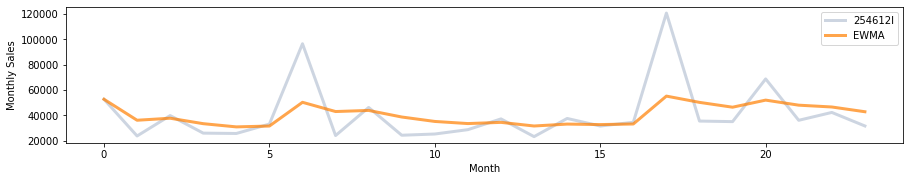

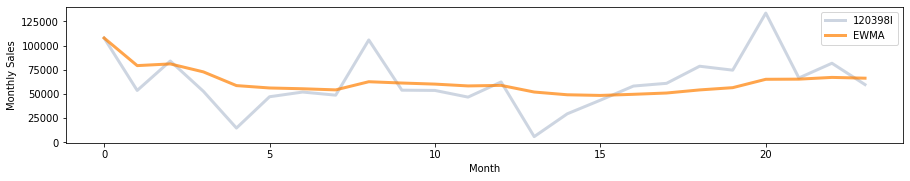

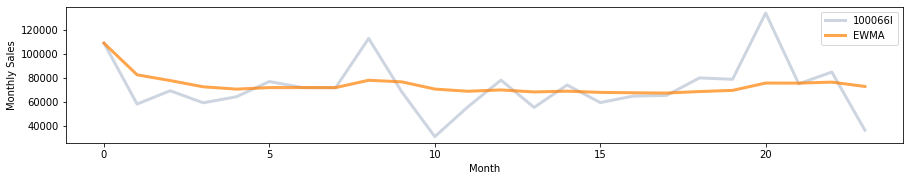

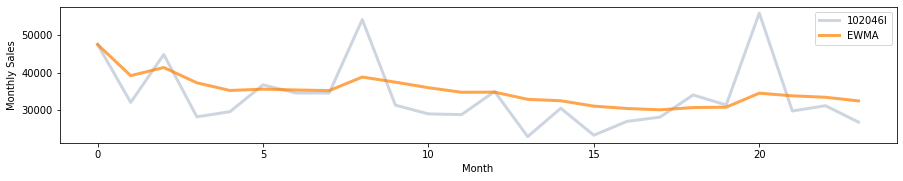

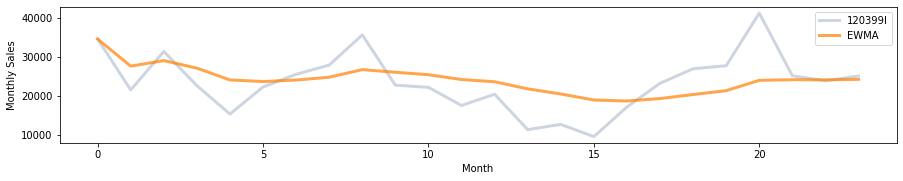

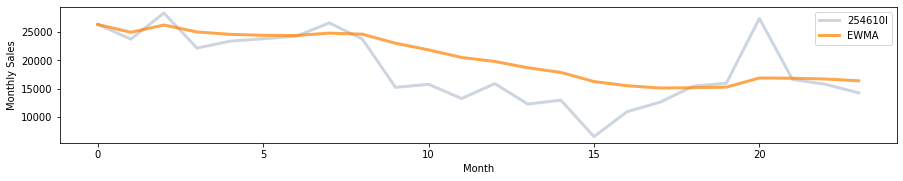

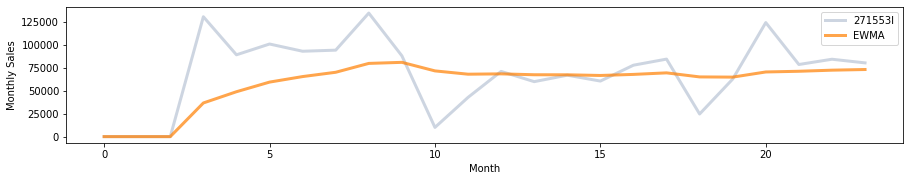

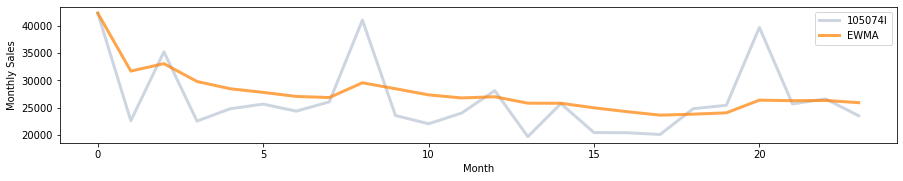

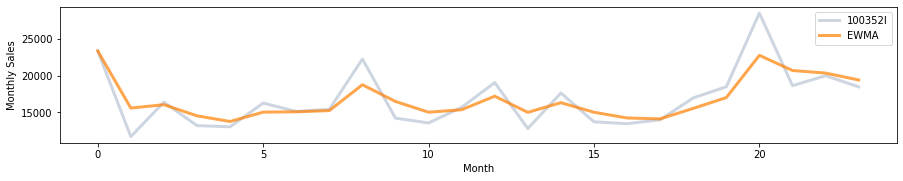

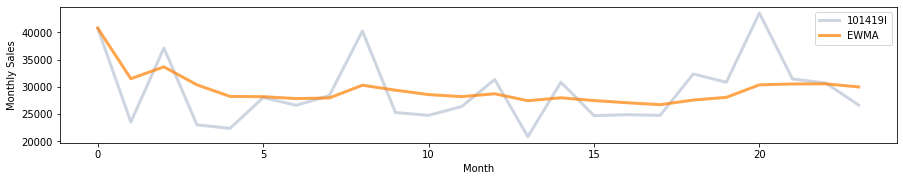

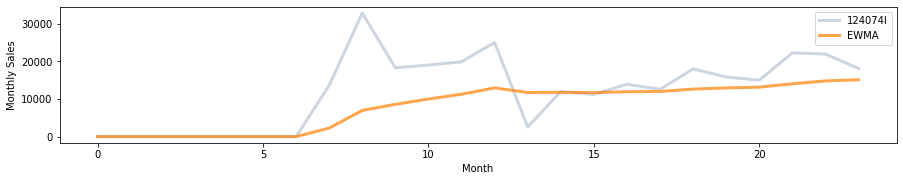

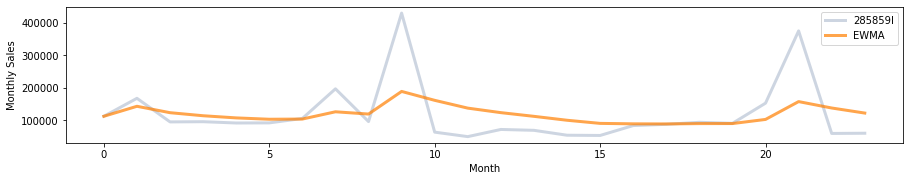

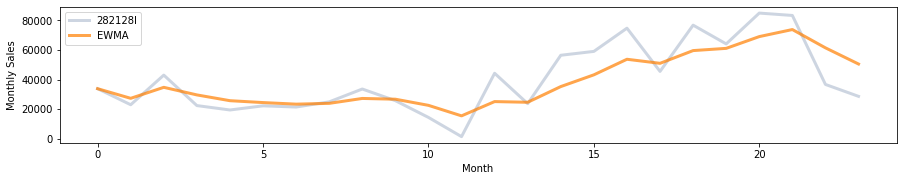

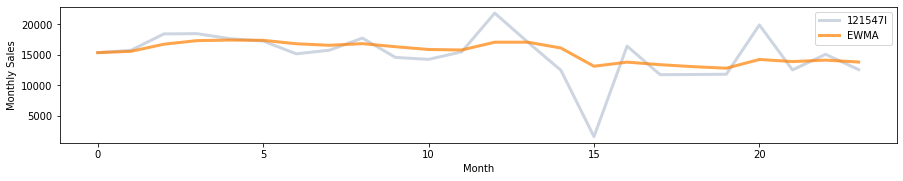

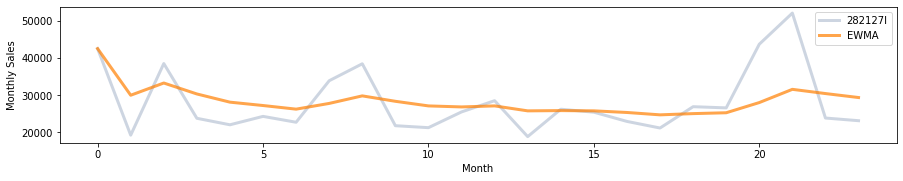

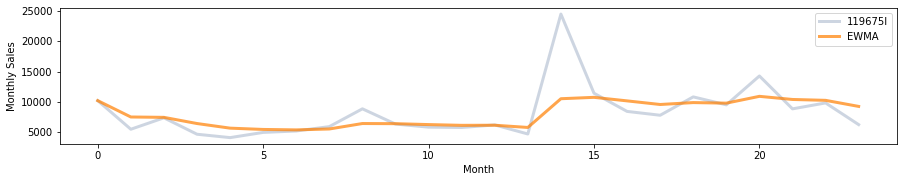

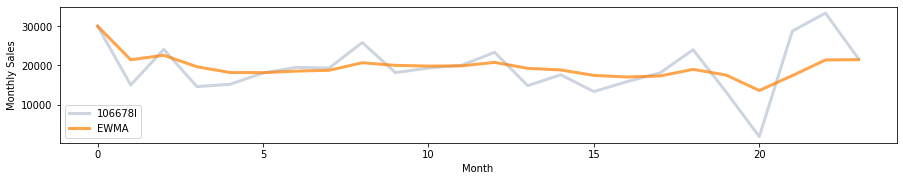

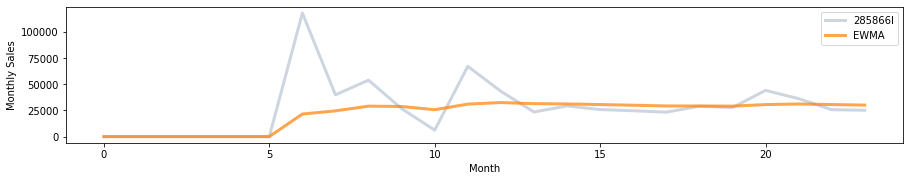

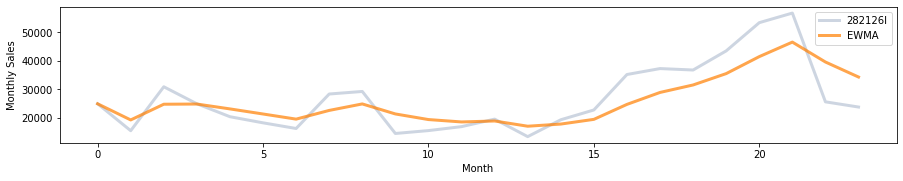

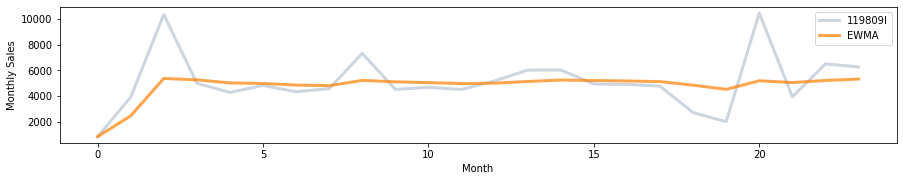

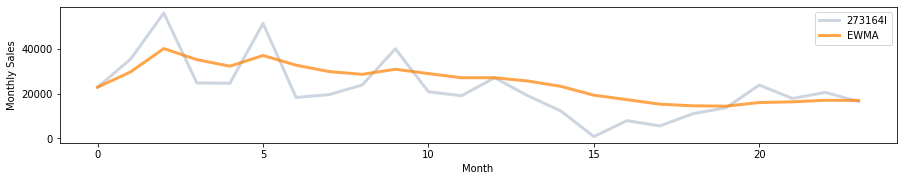

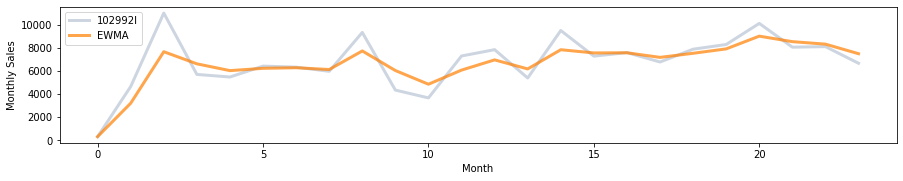

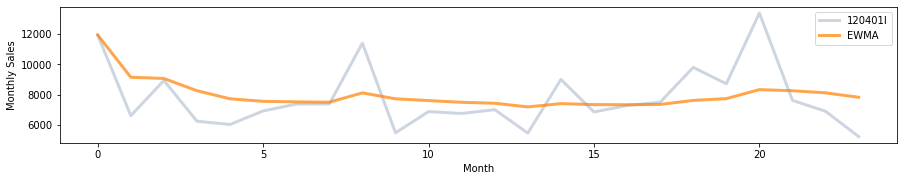

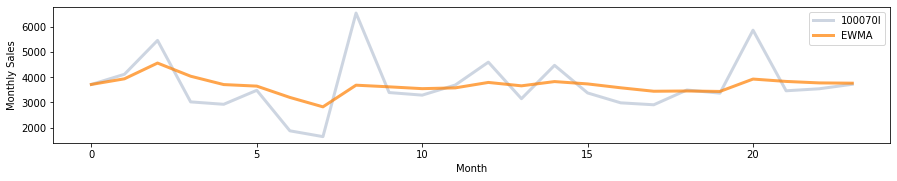

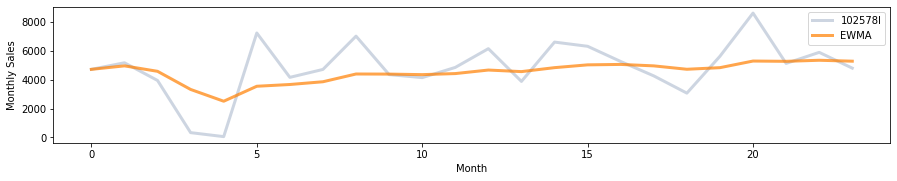

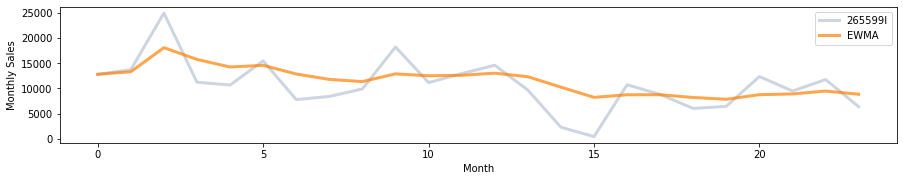

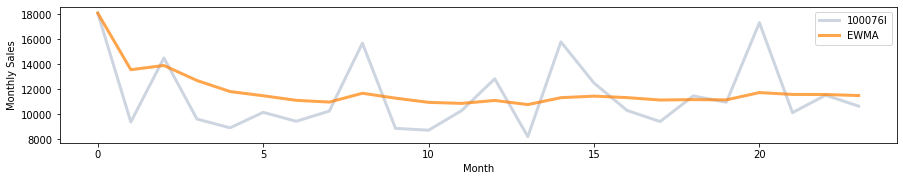

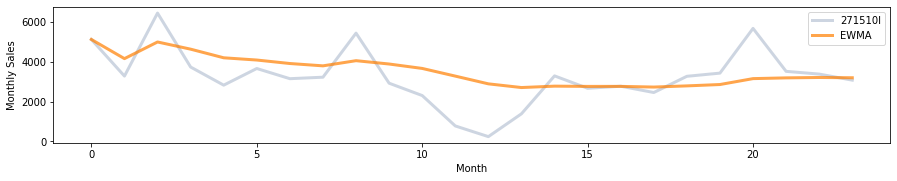

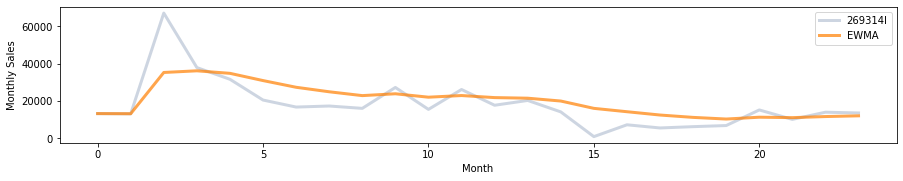

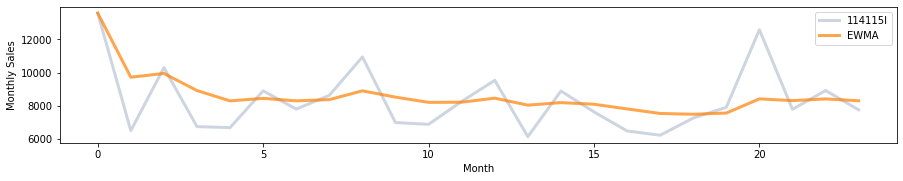

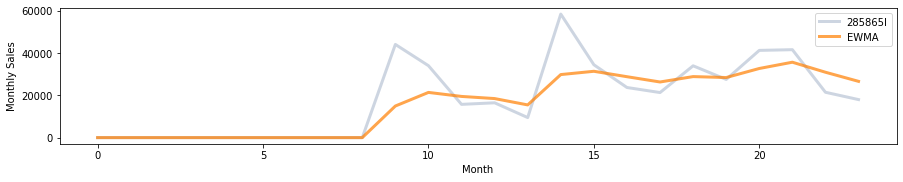

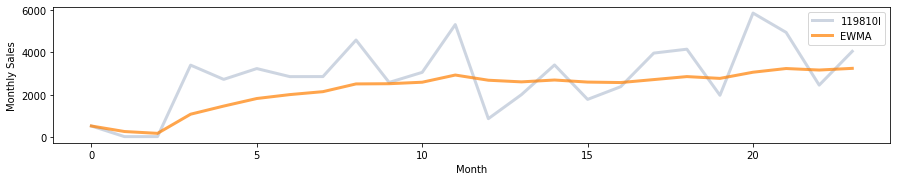

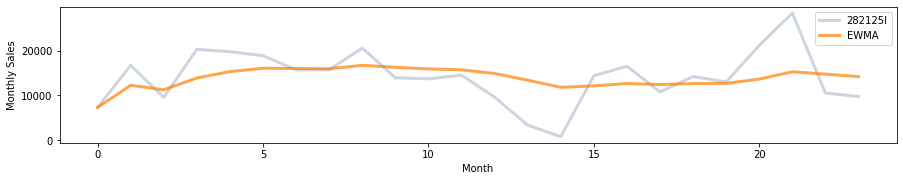

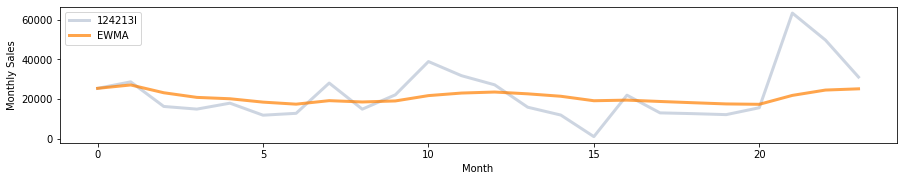

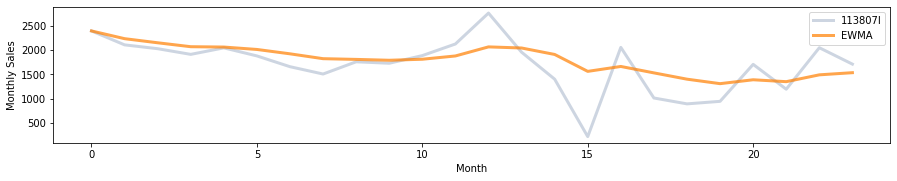

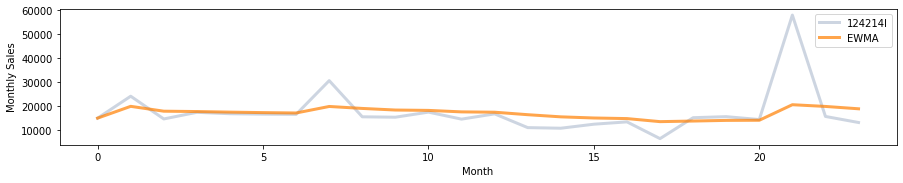

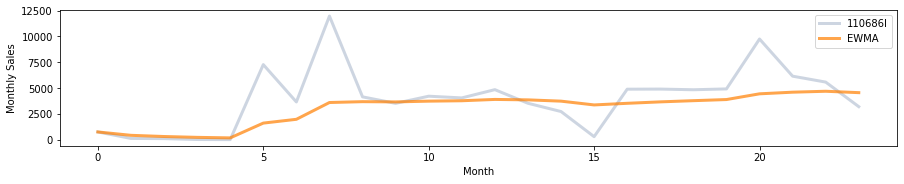

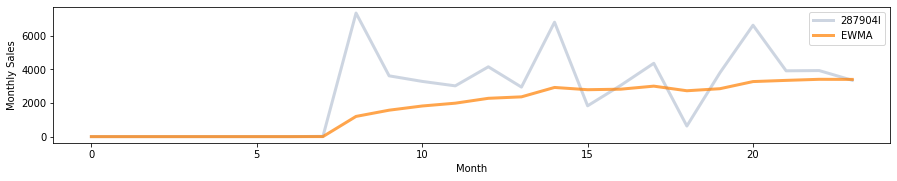

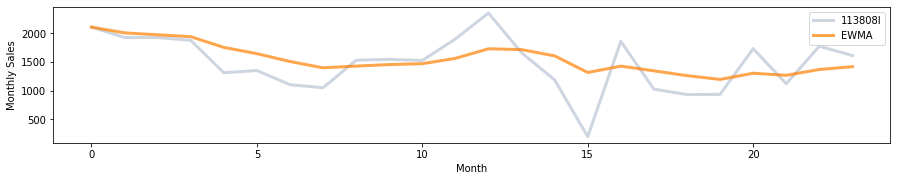

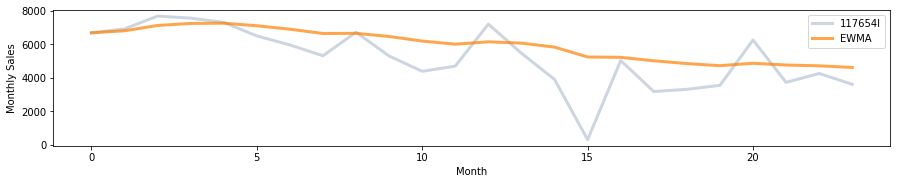

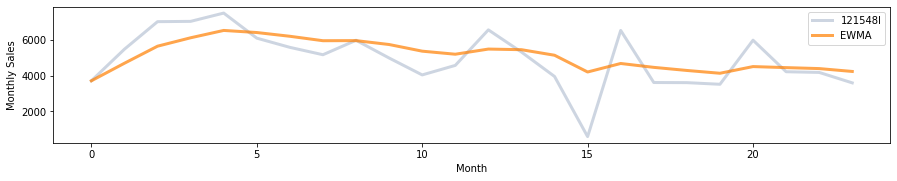

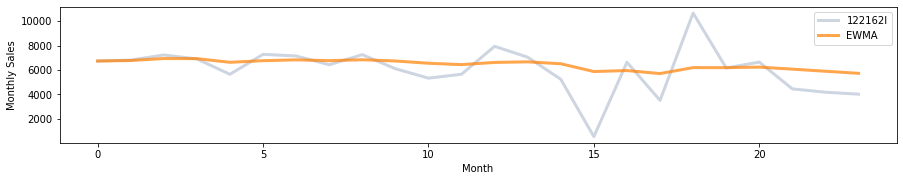

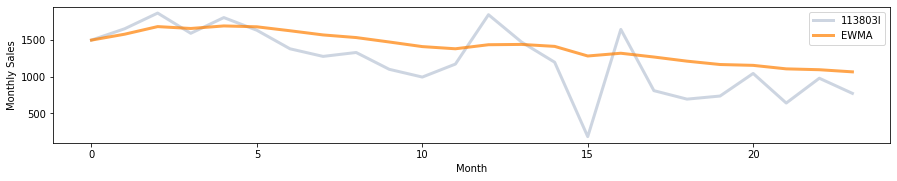

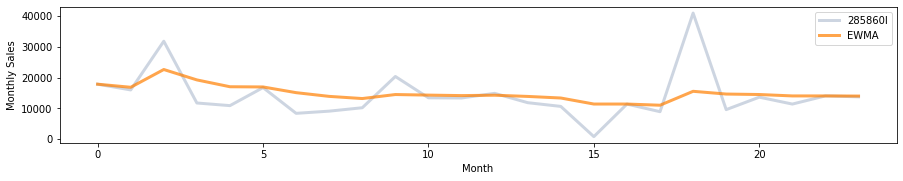

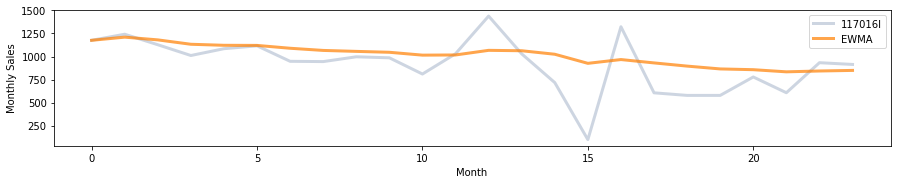

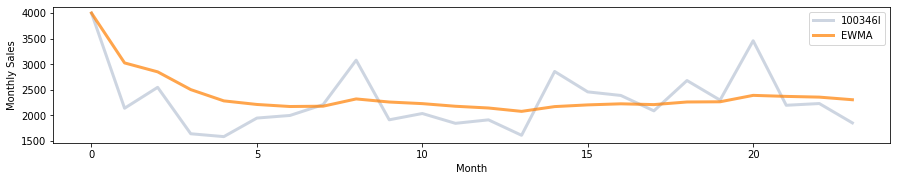

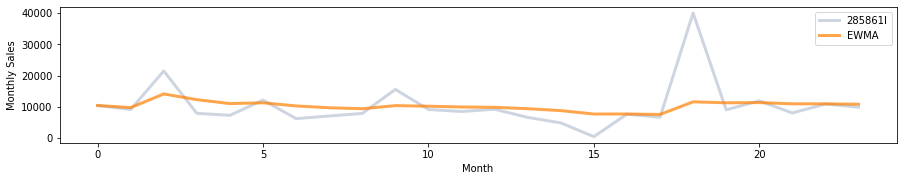

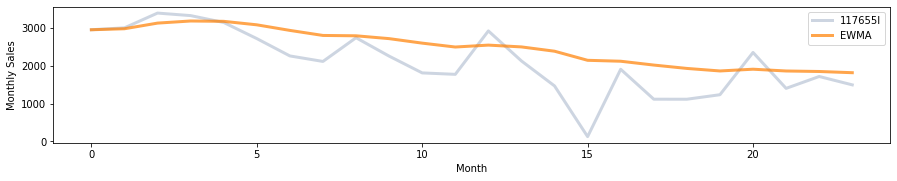

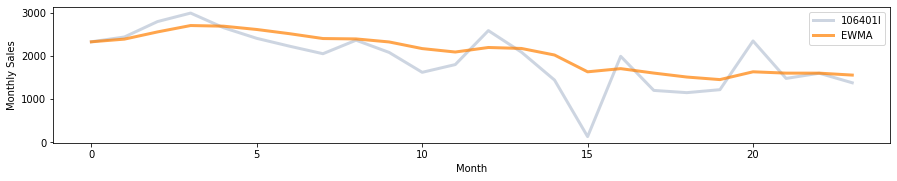

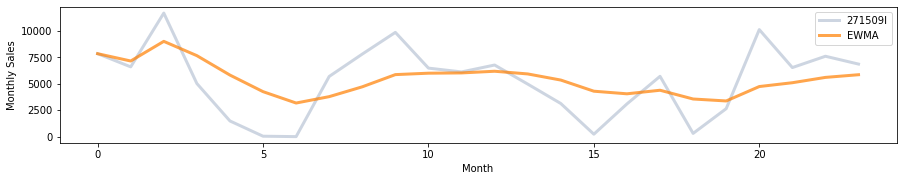

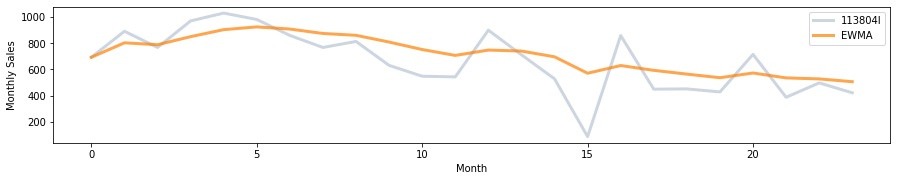

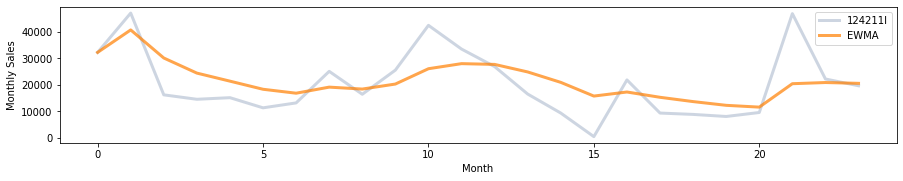

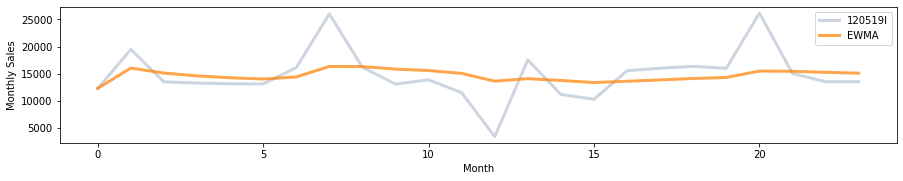

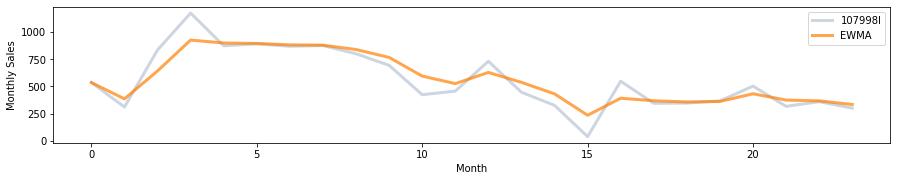

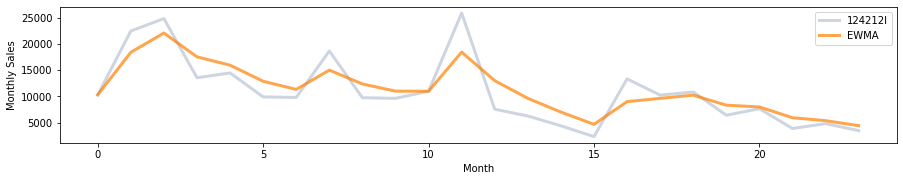

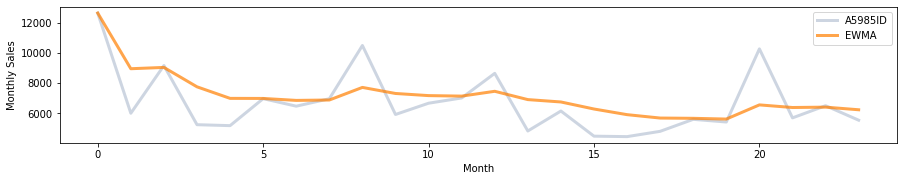

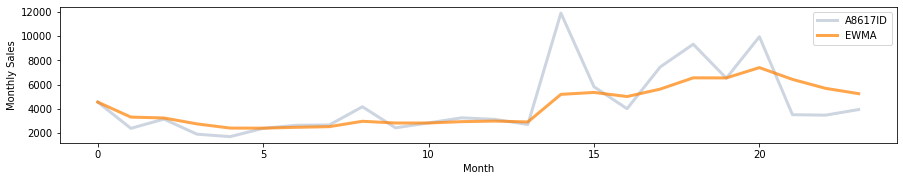

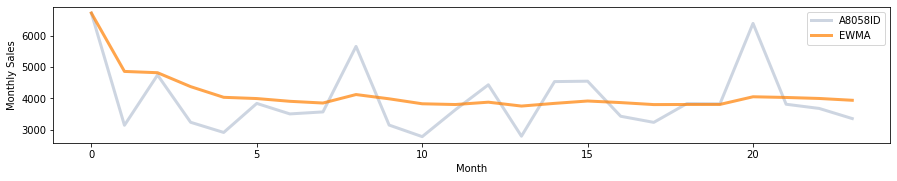

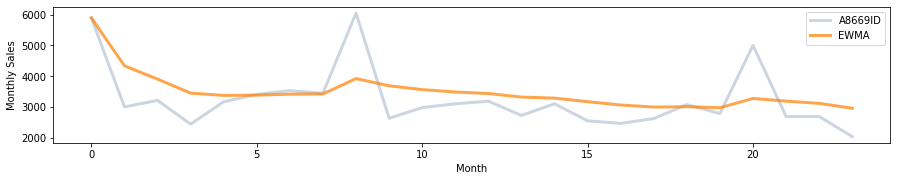

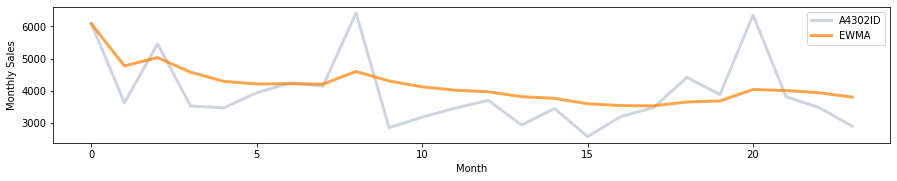

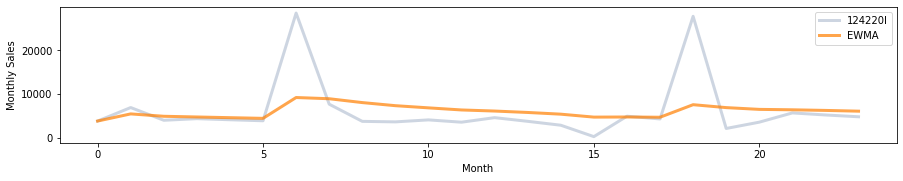

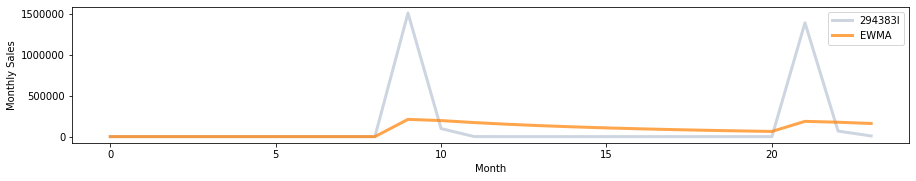

In [25]:
for i in range(1,70):
    for j in range(62):
        if sales.columns[i] == Ref['SKU No.'][j]:
            PlotEWMA(sales,i,Ref['Best Interval'][j])
        else:
            continue

## Including Testset

In [26]:
df = pd.DataFrame({'Month':['Jan-21', 'Feb-21','Mar-21']})

In [27]:
for column in sales.columns:
    df = df.append(pd.DataFrame({column: []}))

In [28]:
sales_test = df.append(pd.DataFrame({column: []}))

In [29]:
sales_test

Month  254612I  120398I  100066I  102046I  120399I  254610I  271553I  \
0  Jan-21      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1  Feb-21      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2  Mar-21      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   105074I  100352I  ...  124218I  124219I  A5985ID  A8617ID  A8058ID  \
0      NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   

   A8669ID  A4302ID  124220I  294383I  306912I  
0      NaN      NaN      NaN      NaN      NaN  
1      NaN      NaN      NaN      NaN      NaN  
2      NaN      NaN      NaN      NaN      NaN  

[3 rows x 70 columns]

In [30]:
sales_p = pd.concat([sales, sales_test])

In [31]:
sales_p = sales_p.reset_index()

In [32]:
sales_p = sales_p.drop(['index'], axis = 1)

In [33]:
sales_p.tail(5)

SKU No.   Month  254612I  120398I  100066I  102046I  120399I  254610I  \
22       Nov-20  42395.0  81710.0  84731.0  31170.0  23874.0  15764.0   
23       Dec-20  31736.0  59629.0  36147.0  26799.0  25103.0  14267.0   
24       Jan-21      NaN      NaN      NaN      NaN      NaN      NaN   
25       Feb-21      NaN      NaN      NaN      NaN      NaN      NaN   
26       Mar-21      NaN      NaN      NaN      NaN      NaN      NaN   

SKU No.  271553I  105074I  100352I  ...  124218I  124219I  A5985ID  A8617ID  \
22       84082.0  26596.0  20004.0  ...      0.0      0.0   6509.0   3485.0   
23       80130.0  23510.0  18483.0  ...      0.0      0.0   5550.0   3946.0   
24           NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
25           NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   
26           NaN      NaN      NaN  ...      NaN      NaN      NaN      NaN   

SKU No.  A8058ID  A8669ID  A4302ID  124220I  294383I  306912I  
22        3674.0   2693.0   3470.0   5221.0  67928.0  67926.0  
23        3350.0   2039.0   2891.0   4806.0   8250.0   8250.0  
24           NaN      NaN      NaN      NaN      NaN      NaN  
25           NaN      NaN      NaN      NaN      NaN      NaN  
26           NaN      NaN      NaN      NaN      NaN      NaN  

[5 rows x 70 columns]

## Forecasting upcoming Sales

In [34]:
def PlotEWMA(sales, i, p):
    """Plots rolling mean.

    sales: DataFrame of monthly sales
    """
    plt.figure(figsize=(15,2.5))
    thinkplot.plot(sales[sales_p.columns[i]], alpha=0.2, label=sales_p.columns[i])
    roll_mean = sales_p[sales_p.columns[i]].ewm(p).mean()
    thinkplot.Plot(roll_mean, label='EWMA', color='#ff7f00')
    thinkplot.Config(ylabel='Monthly Sales', xlabel = 'Month')

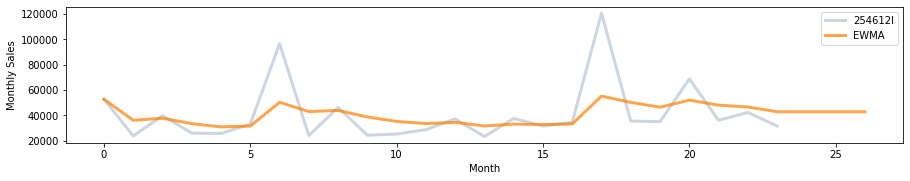

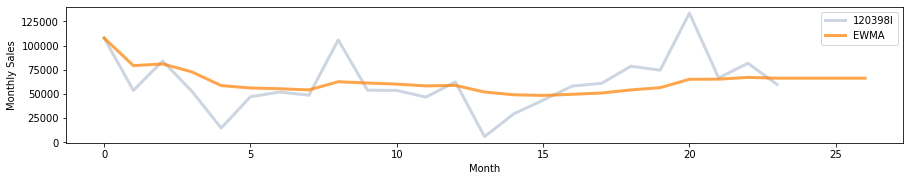

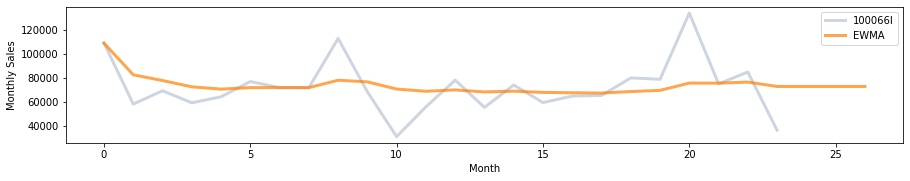

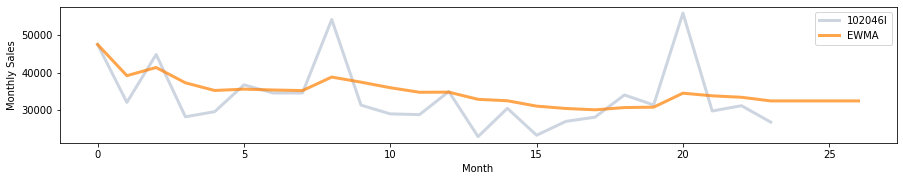

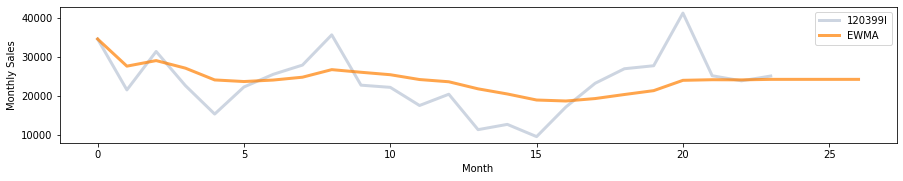

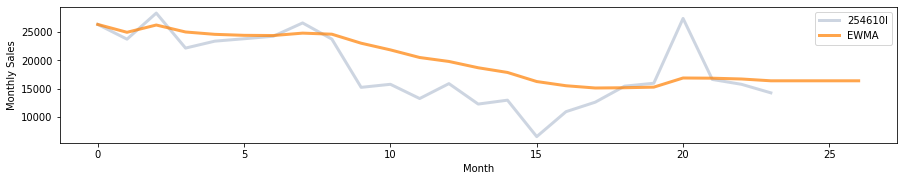

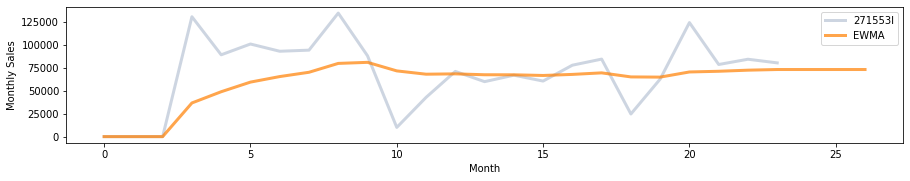

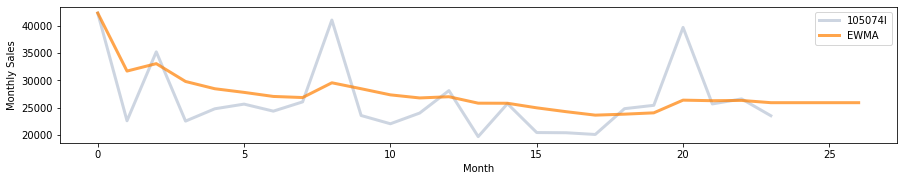

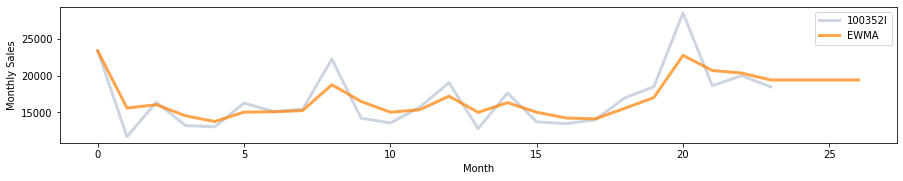

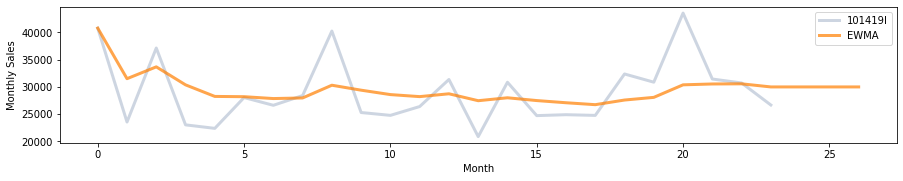

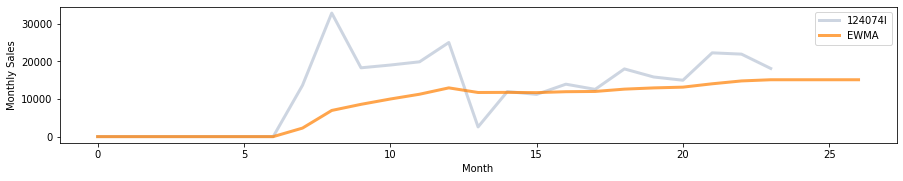

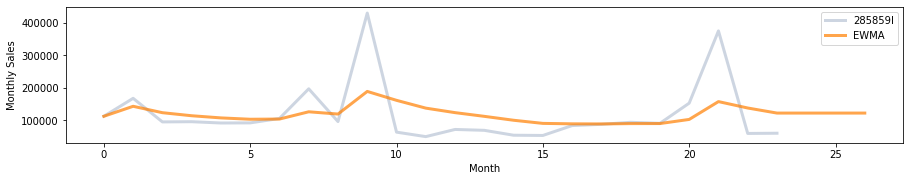

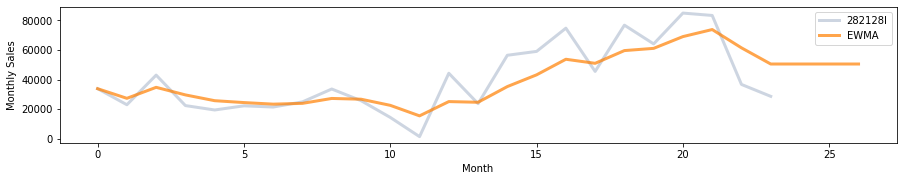

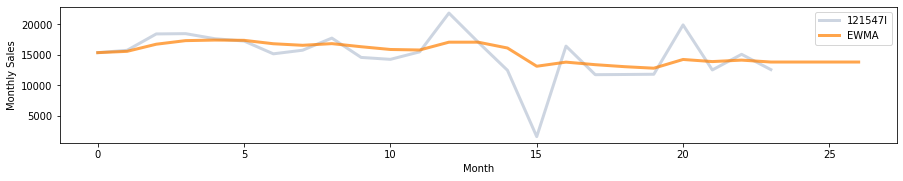

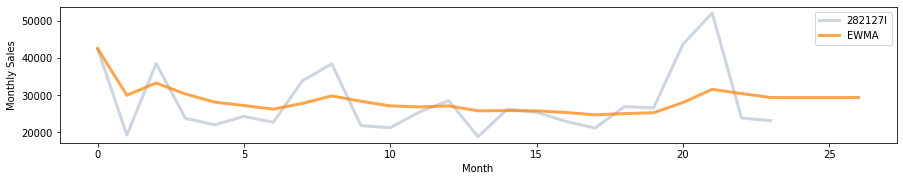

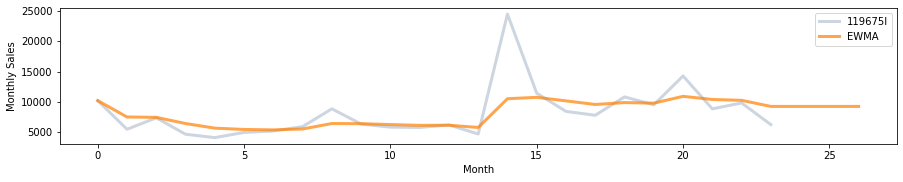

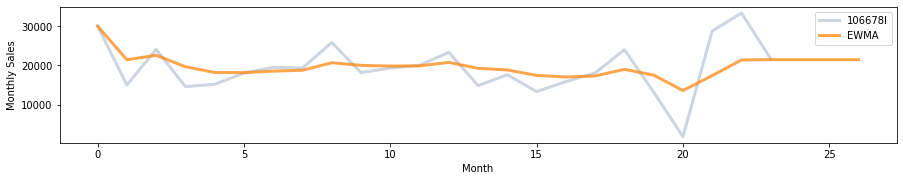

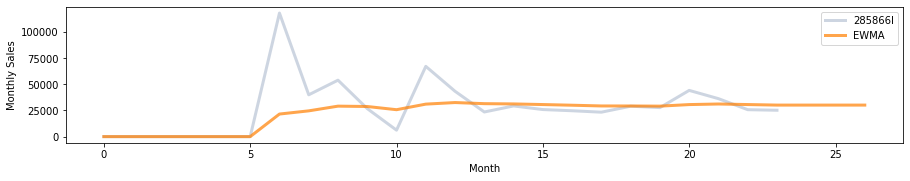

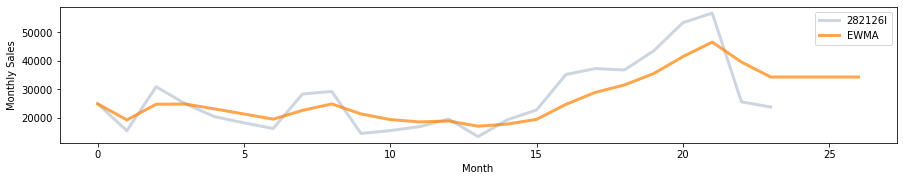

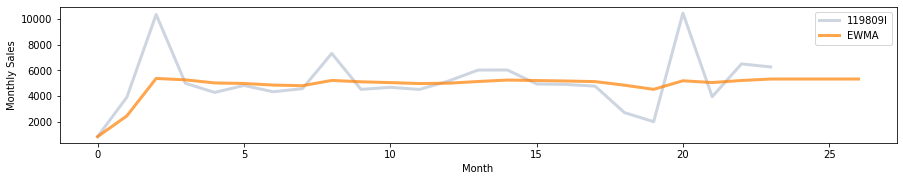

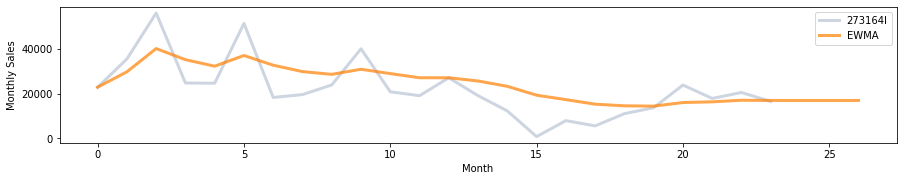

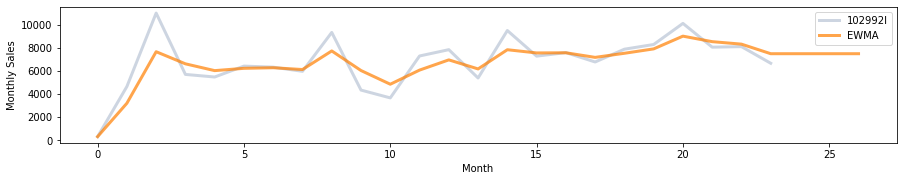

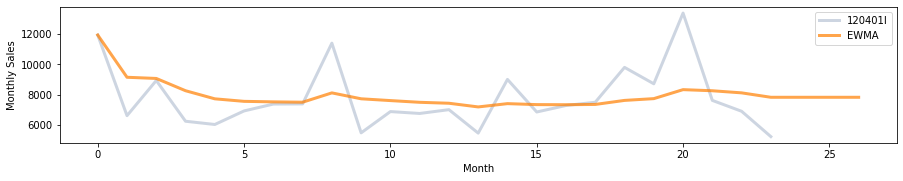

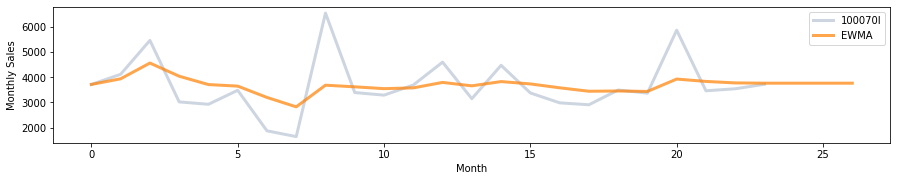

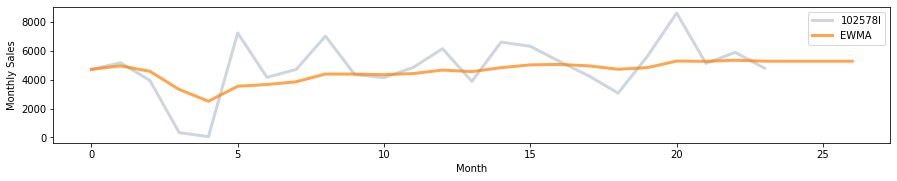

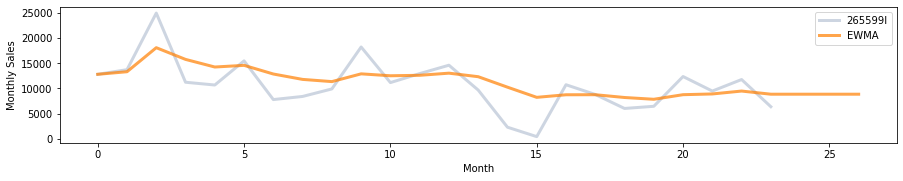

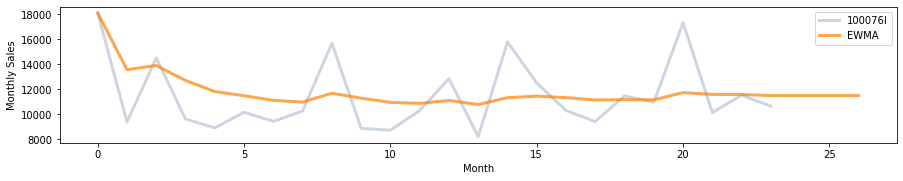

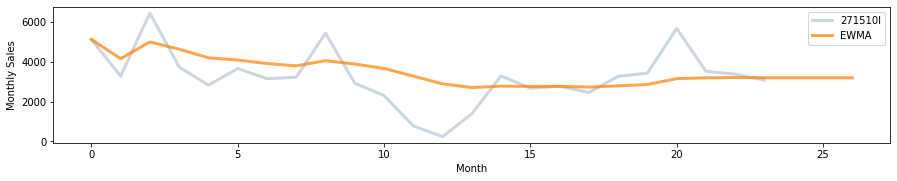

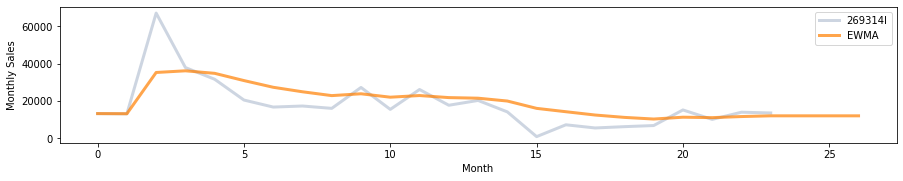

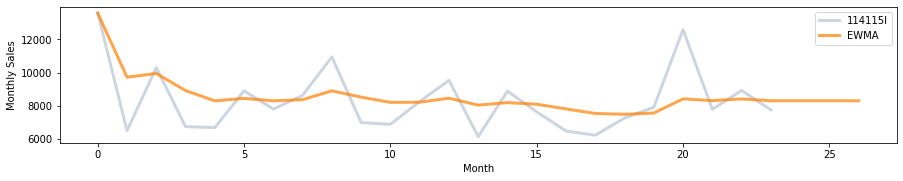

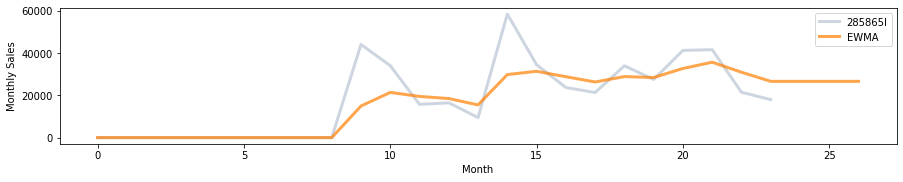

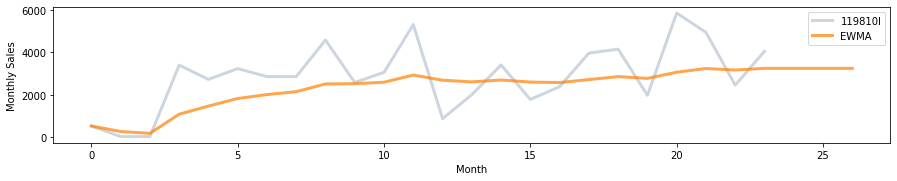

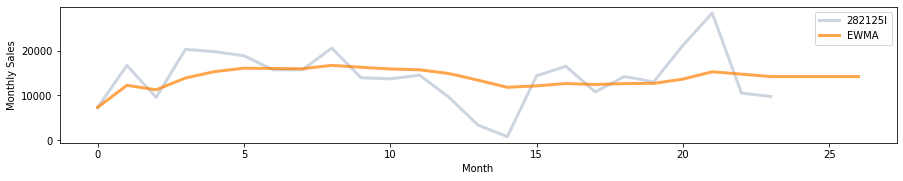

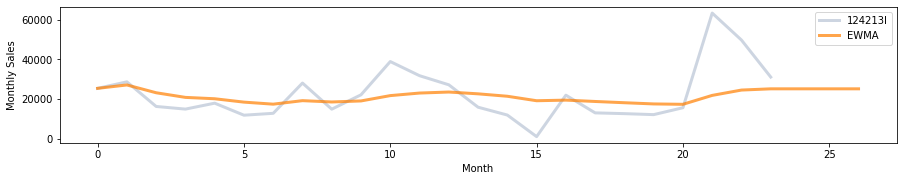

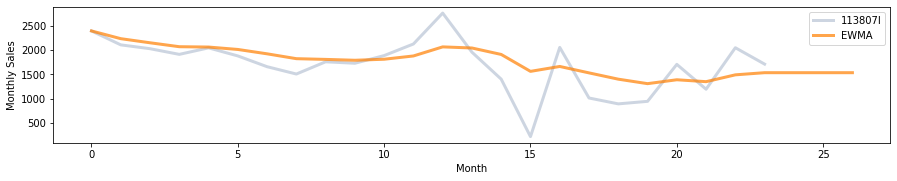

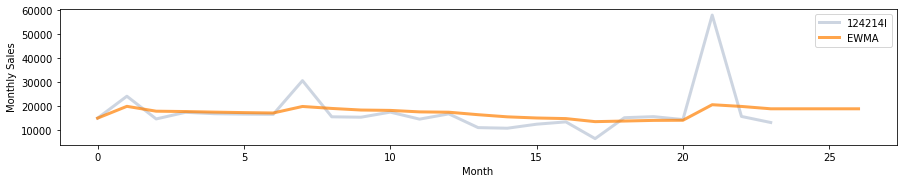

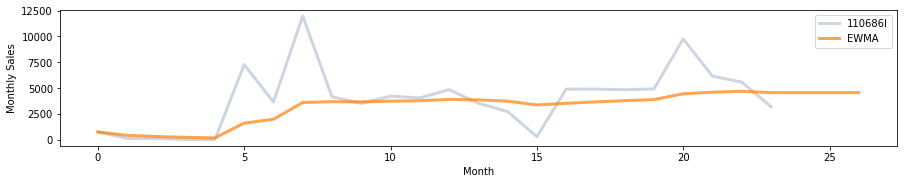

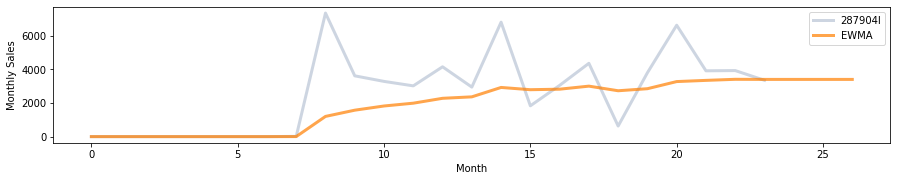

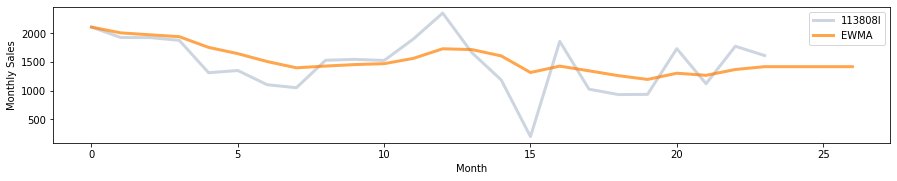

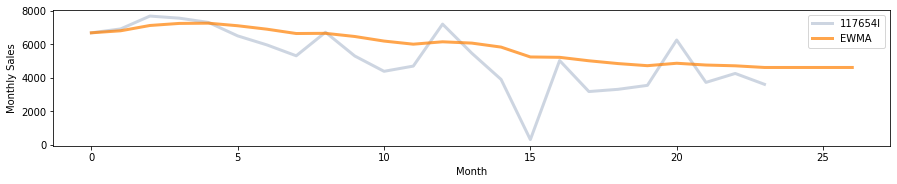

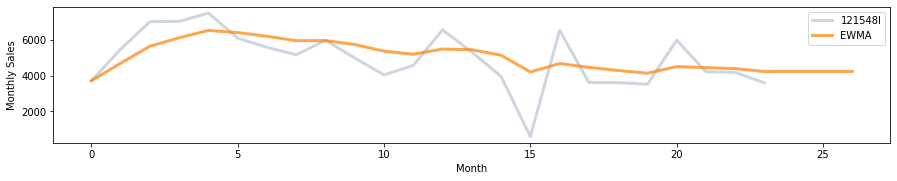

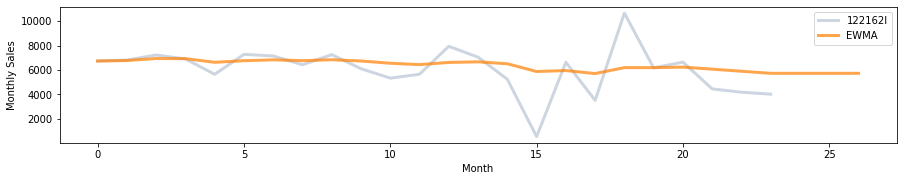

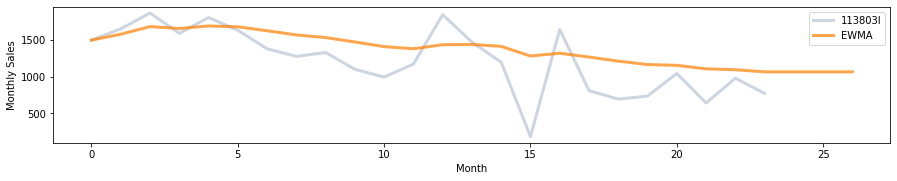

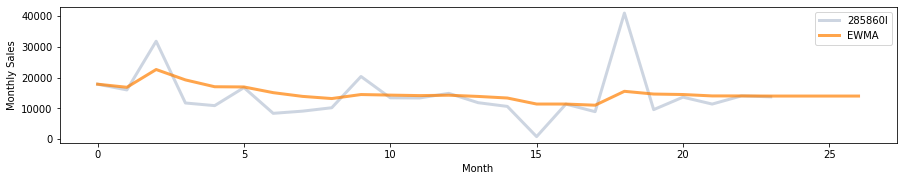

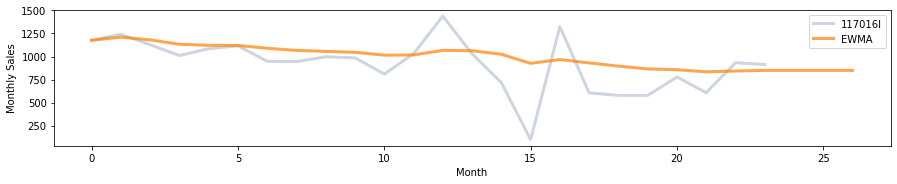

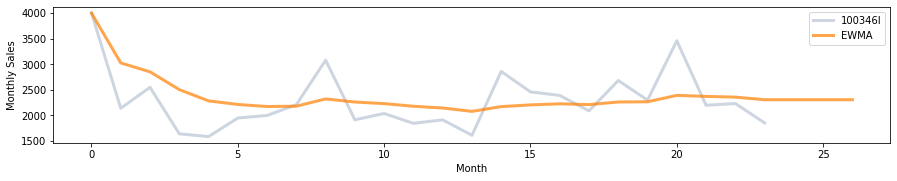

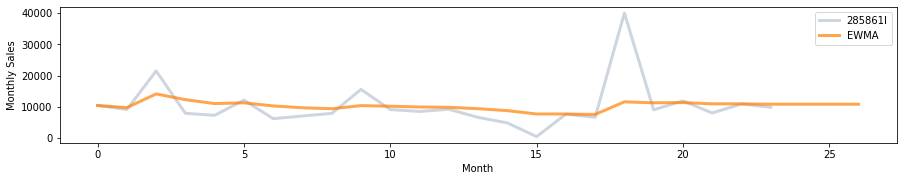

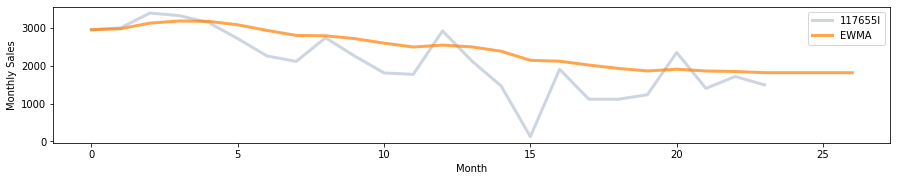

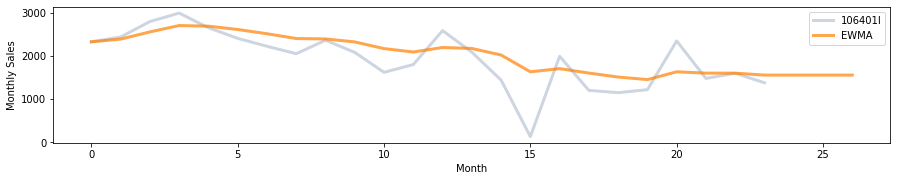

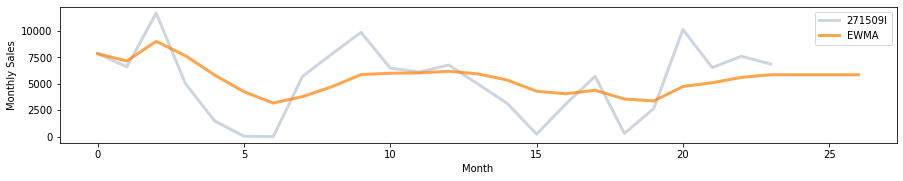

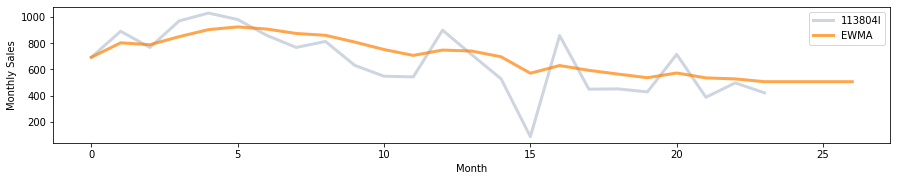

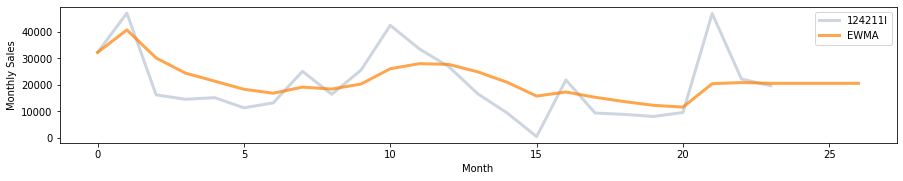

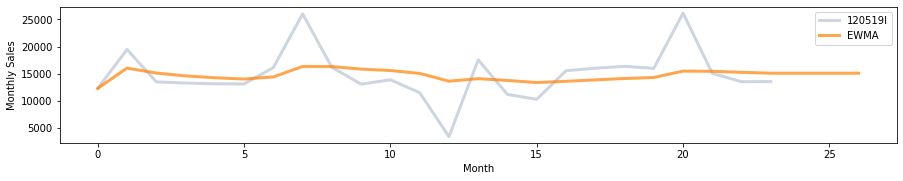

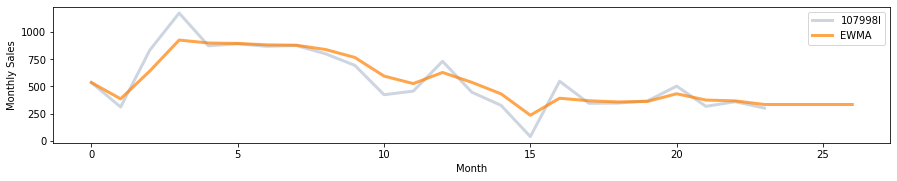

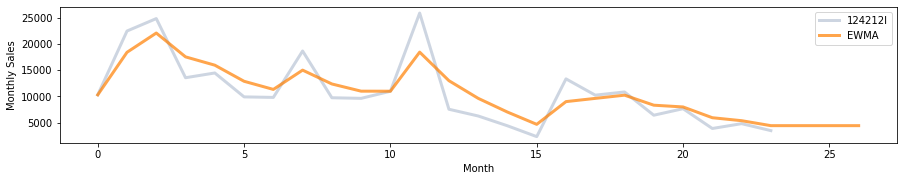

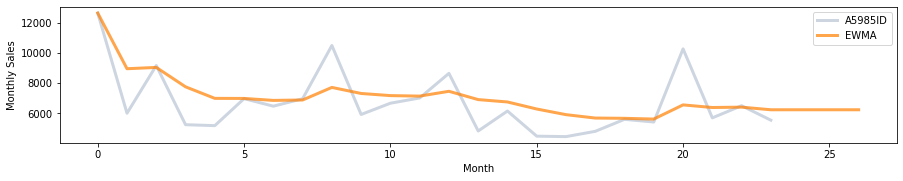

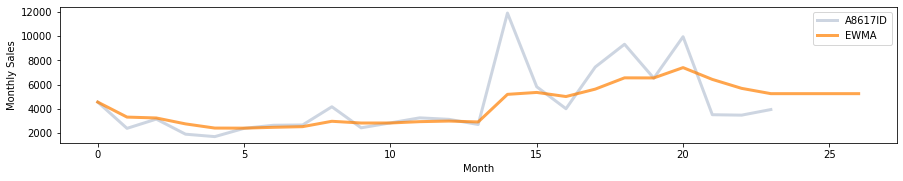

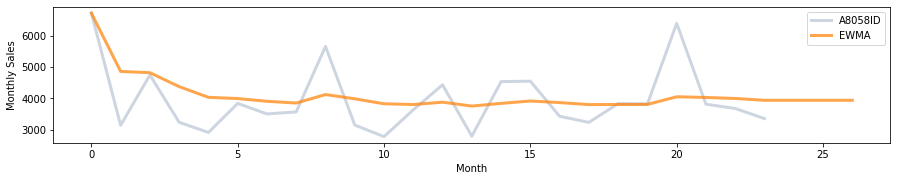

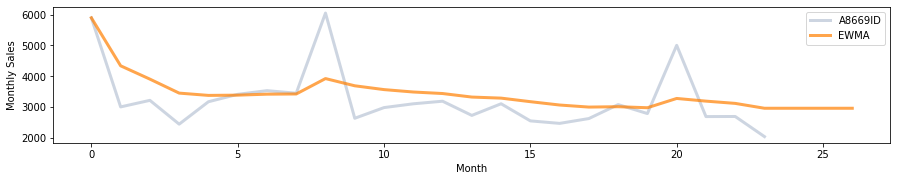

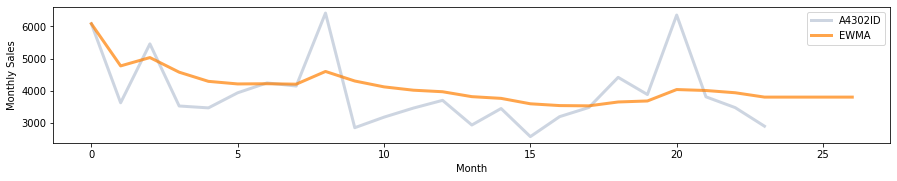

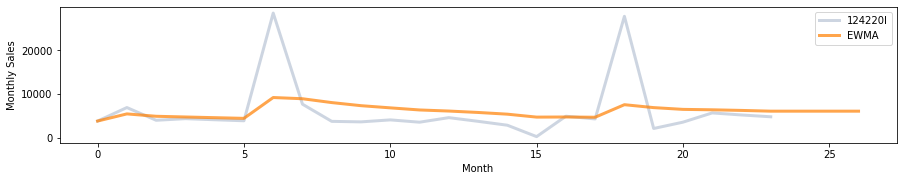

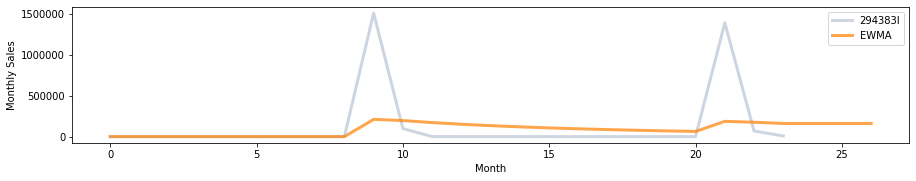

In [35]:
for i in range(1,70):
    for j in range(62):
        if sales_p.columns[i] == Ref['SKU No.'][j]:
            PlotEWMA(sales_p,i,Ref['Best Interval'][j])
        else:
            continue

In [36]:
Predictions = {}

for i in range(1,70):
    for j in range(62):
        if sales_p.columns[i] == Ref['SKU No.'][j]:
            Predictions[sales_p.columns[i]] = sales_p[sales_p.columns[i]].ewm(Ref['Best Interval'][j]).mean()
        else:
            continue

In [37]:
Predictions

{'254612I': 0     52759.000000
 1     36245.285714
 2     37835.216216
 3     33542.017143
 4     31014.134443
 5     31684.392337
 6     50371.467704
 7     43100.425553
 8     43968.227826
 9     38794.839172
 10    35300.025446
 11    33632.188081
 12    34572.223736
 13    31716.280758
 14    33222.083302
 15    32837.457528
 16    33294.025141
 17    55247.033553
 18    50314.418675
 19    46513.259726
 20    52088.705484
 21    48110.182197
 22    46679.472565
 23    42939.852122
 24    42939.852122
 25    42939.852122
 26    42939.852122
 Name: 254612I, dtype: float64,
 '120398I': 0     107779.000000
 1      79257.421053
 2      81010.771218
 3      72786.644664
 4      58611.253425
 5      56151.530439
 6      55344.839730
 7      54182.160452
 8      62606.020313
 9      61264.744229
 10     60149.491766
 11     58277.690675
 12     58828.271991
 13     51963.247353
 14     49129.851548
 15     48443.848676
 16     49607.773699
 17     50943.243126
 18     54143.067660
 19    

In [48]:
Forecasts = pd.DataFrame(Predictions)
Forecasts['Month'] = sales_p['Month']

In [49]:
roll_mean = sales_p[sales_p.columns[2]].ewm(6).mean()

In [50]:
roll_mean

0     107779.000000
1      78599.230769
2      80686.464567
3      72007.954751
4      56781.782416
5      54486.386883
6      53935.939734
7      52885.049743
8      62957.667744
9      61305.842584
10     59959.741538
11     57715.047059
12     58485.959817
13     49989.547333
14     46734.847186
15     46236.258623
16     48070.545160
17     50034.070126
18     54348.258511
19     57375.803761
20     68701.953286
21     68374.064649
22     70335.804637
23     68767.471512
24     68767.471512
25     68767.471512
26     68767.471512
Name: 120398I, dtype: float64

In [51]:
Forecasts

254612I        120398I        100066I       102046I       120399I  \
0   52759.000000  107779.000000  108879.000000  47481.000000  34558.000000   
1   36245.285714   79257.421053   82424.000000  39172.538462  27622.533333   
2   37835.216216   81010.771218   77625.336887  41348.393701  29041.692308   
3   33542.017143   72786.644664   72411.122556  37271.382805  27110.382301   
4   31014.134443   58611.253425   70464.829080  35225.738567  24101.606541   
5   31684.392337   56151.530439   71742.224830  35582.333385  23693.498945   
6   50371.467704   55344.839730   71748.460849  35359.994921  24072.325028   
7   43100.425553   54182.160452   71728.377881  35198.318693  24800.487526   
8   43968.227826   62606.020313   77879.802646  38803.839746  26733.824398   
9   38794.839172   61264.744229   76530.199384  37443.717071  26060.616897   
10  35300.025446   60149.491766   70520.729247  35964.144859  25434.874417   
11  33632.188081   58277.690675   68672.276293  34749.195115  24204.433004   
12  34572.223736   58828.271991   69780.996961  34781.690494  23634.723170   
13  31716.280758   51963.247353   68117.469212  32867.570927  21826.838792   
14  33222.083302   49129.851548   68753.052103  32488.362182  20515.112745   
15  32837.457528   48443.848676   67738.771296  31054.912020  18970.903346   
16  33294.025141   49607.773699   67420.353651  30428.641622  18722.085366   
17  55247.033553   50943.243126   67193.455423  30077.964871  19344.184409   
18  50314.418675   54143.067660   68437.818083  30675.332409  20378.061625   
19  46513.259726   56468.476297   69425.252131  30778.288168  21365.251078   
20  52088.705484   65123.109931   75527.232883  34506.680003  24001.888283   
21  48110.182197   65274.064505   75466.926177  33804.368551  24156.336123   
22  46679.472565   67077.494982   76313.934918  33416.848217  24119.328258   
23  42939.852122   66268.081445   72694.007873  32447.465574  24247.486464   
24  42939.852122   66268.081445   72694.007873  32447.465574  24247.486464   
25  42939.852122   66268.081445   72694.007873  32447.465574  24247.486464   
26  42939.852122   66268.081445   72694.007873  32447.465574  24247.486464   

         254610I       271553I       105074I       100352I       101419I  ...  \
0   26295.000000      0.000000  42325.000000  23375.000000  40791.000000  ...   
1   24913.666667      0.000000  31696.846154  15595.000000  31510.615385  ...   
2   26193.035503      0.000000  33056.559055  16056.142857  33682.196850  ...   
3   24968.151622  36576.049073  29787.797285  14536.066667  30376.609050  ...   
4   24554.432366  48780.249647  28457.743439  13765.451613  28253.007087  ...   
5   24378.582906  59238.103090  27790.666207  15038.619048  28203.526404  ...   
6   24345.736325  65250.994004  27046.460115  15087.692913  27861.680729  ...   
7   24767.029310  69920.830311  26845.177961  15250.482353  27972.217828  ...   
8   24578.811491  79557.911879  29549.520786  18768.612524  30310.396869  ...   
9   22993.877678  80713.035012  28459.196201  16492.583578  29398.952134  ...   
10  21821.041480  71423.187473  27335.930067  15029.577430  28589.953674  ...   
11  20482.100501  67834.851937  26770.773709  15364.870574  28217.533644  ...   
12  19785.432029  68194.780316  26992.560114  17212.660847  28736.896374  ...   
13  18678.562612  67229.265103  25811.760888  15010.696026  27466.560941  ...   
14  17855.133910  67175.862878  25797.211233  16327.888211  28003.833621  ...   
15  16255.928667  66450.695174  24958.872469  15023.924208  27492.446230  ...   
16  15517.390126  67605.723052  24255.420400  14244.956161  27092.880730  ...   
17  15120.460898  69280.966384  23618.798750  14122.477613  26738.815642  ...   
18  15164.648322  64881.346440  23798.128349  15548.241526  27589.307388  ...   
19  15271.056671  64654.478033  24040.800934  17021.122168  28080.184509  ...   
20  16878.651793  70257.066505  26368.388488  22775.563828  30381.544312  ...   
21  16844.907265  71010.298638  26265.2908